<a href="https://colab.research.google.com/github/Susanna-Salata/Sigma-University/blob/main/Sigma_WS_4_Susanna_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризація клієнтів

## Про дані

### Задача

Аналіз особистості клієнта – це детальний аналіз ідеальних клієнтів компанії. Він допомагає компанії краще розуміти своїх клієнтів і полегшує підбір продуктів для них відповідно до конкретних потреб, поведінки та проблем різних типів клієнтів.

Аналіз особистості клієнта допомагає компанії модифікувати свій продукт на основі цільових клієнтів із різних сегментів споживачів. Наприклад, замість того, щоб витрачати гроші на просування нового продукту кожному клієнту в базі даних компанії, компанія може проаналізувати, який сегмент споживачів найімовірніше придбає продукт, а потім продавати продукт лише в цьому конкретному сегменті.

### Параметри

#### - Характеристики людей

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

#### - Характеристики товарів

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

#### - Інформація про акції

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### - Інформація про покупки

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

### Ціль
Здійснити кластеризацію з метою визначення цільових сегментів споживачів.

### Подяка
Набір даних для цього проекту надав доктор Омар Ромеро-Ернандес.

### Рішення
Ви можете отримати допомогу за наступним посиланням, щоб дізнатися більше про підхід до вирішення цієї проблеми.
Деталі за посиланням: https://thecleverprogrammer.com/2021/02/08/customer-personality-analysis-with-python/


# Підготовка середовища

In [536]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as shc

# Підготовка даних

### Зчитування

In [537]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [538]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Data/marketing_campaign.csv')
df.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [539]:
# перевіряємо розмір датафрейму
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (2240, 29)


In [540]:
# перевіримо основні характеристики
print("\nInformation about the dataframe:")
df.info()


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

як бачимо, більшість даних вже числові і пропуски є лише в полі Income

In [541]:
# перевіримо описову статистику
print("\nSummary statistics of the dataframe:")
df.describe()


Summary statistics of the dataframe:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [542]:
# перевіримо описову статистику текстових полів
print("\nSummary statistics of the dataframe:")
df.describe(include='object')


Summary statistics of the dataframe:


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Missing Data

In [543]:
# Ще раз перевіримо на пропущені дані
print("Missing data in the dataframe:")
df.isnull().sum()

Missing data in the dataframe:


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<Axes: >

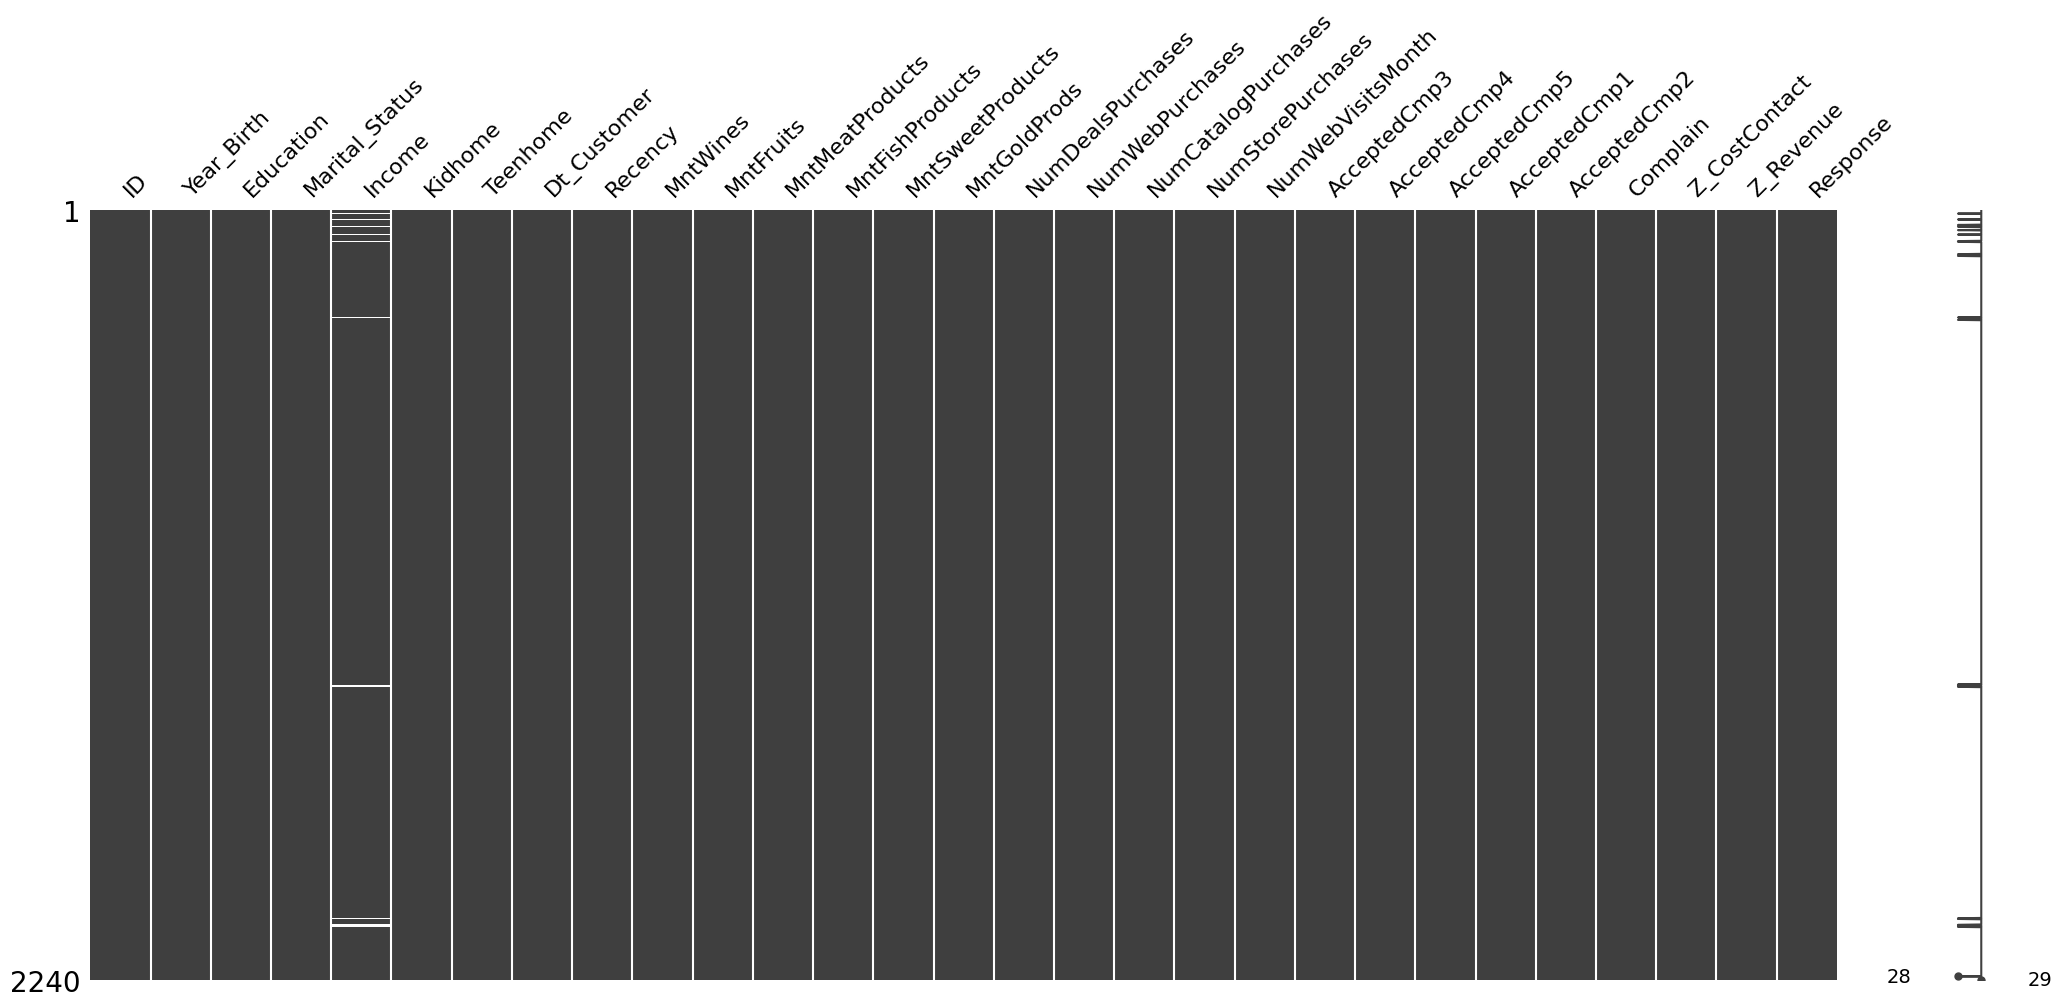

In [544]:
# інструмент візуалізації пропущених даних
msno.matrix(df)

In [545]:
# зімітуємо пропуски
df_missed = df.copy()
for c in df.columns.tolist():
  rows = np.random.randint(df.shape[0], size=1000)
  df_missed.loc[rows, c] = np.nan
df_missed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1413 non-null   float64
 1   Year_Birth           1441 non-null   float64
 2   Education            1445 non-null   object 
 3   Marital_Status       1419 non-null   object 
 4   Income               1419 non-null   float64
 5   Kidhome              1441 non-null   float64
 6   Teenhome             1434 non-null   float64
 7   Dt_Customer          1428 non-null   object 
 8   Recency              1433 non-null   float64
 9   MntWines             1420 non-null   float64
 10  MntFruits            1445 non-null   float64
 11  MntMeatProducts      1437 non-null   float64
 12  MntFishProducts      1438 non-null   float64
 13  MntSweetProducts     1429 non-null   float64
 14  MntGoldProds         1441 non-null   float64
 15  NumDealsPurchases    1438 non-null   f

<Axes: >

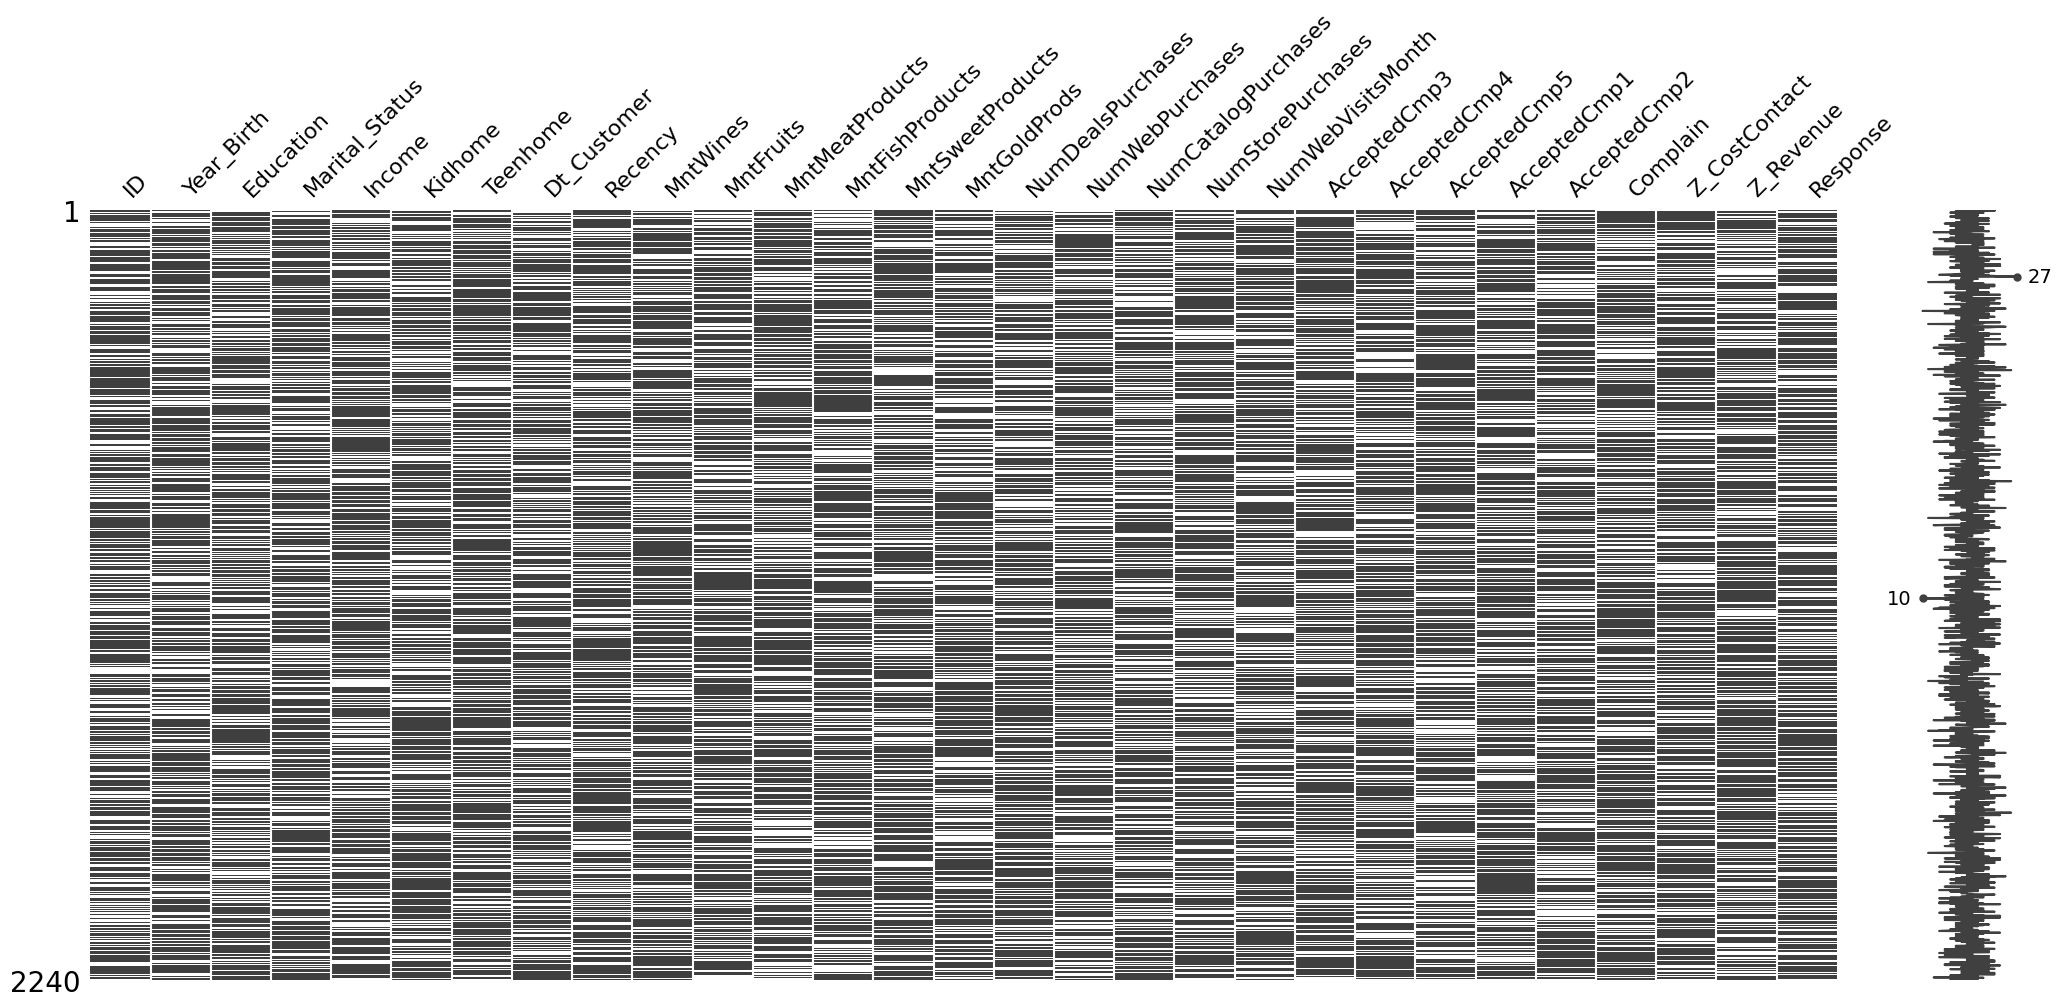

In [546]:
msno.matrix(df_missed)

так як пропущені дані існують лише в колонці і складають малу частку (24 з 2240) ми можемо їх видалити або заповнити середніми. видалимо.

In [547]:
df = df.dropna()

In [548]:
df.duplicated().sum()

0

### Пошукаємо прості викиди

<Axes: >

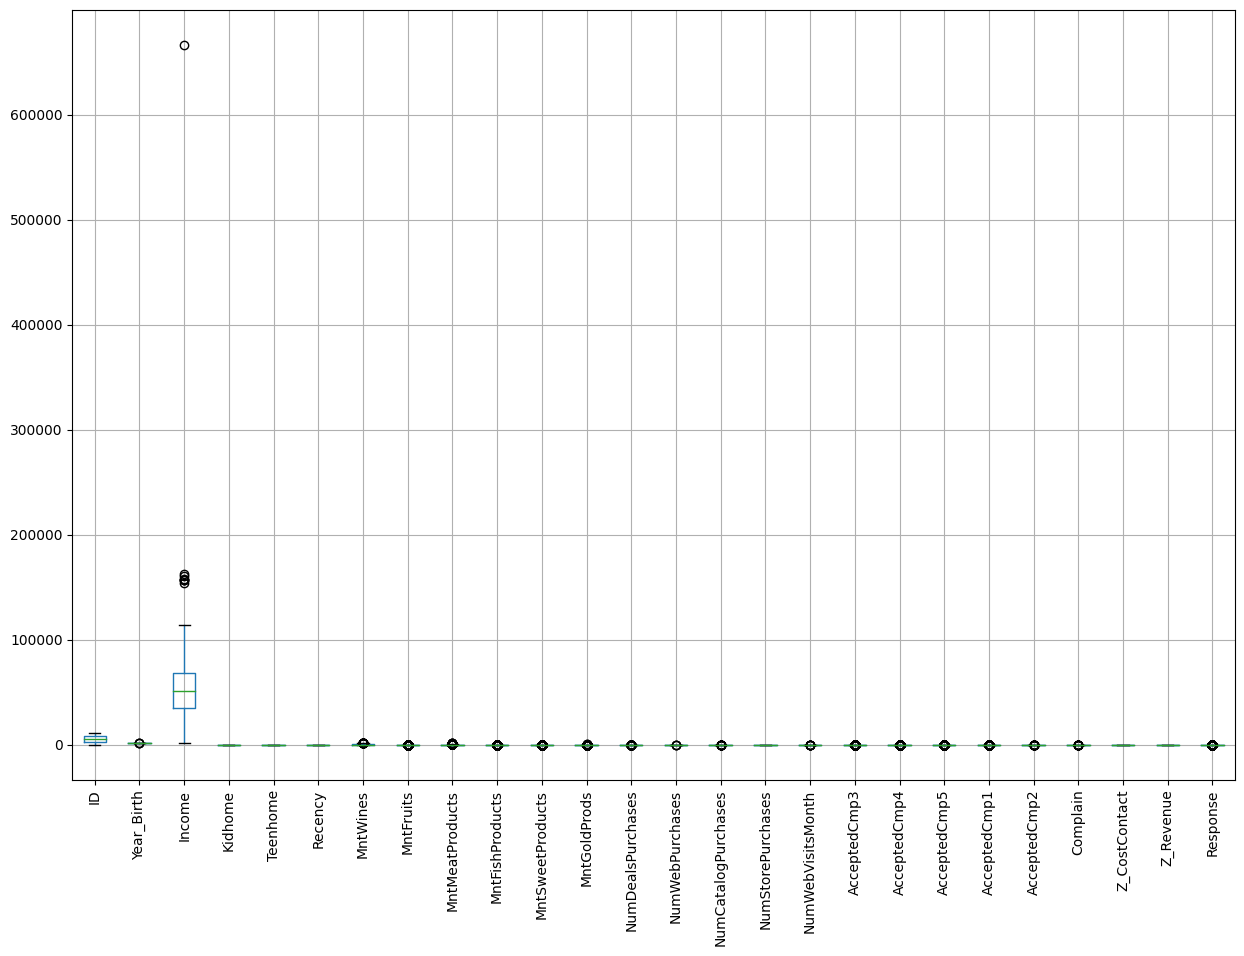

In [549]:
df.boxplot(figsize=(15, 10), rot=90)

<ipython-input-550-b05cde467086>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i, figsize=(15,6))


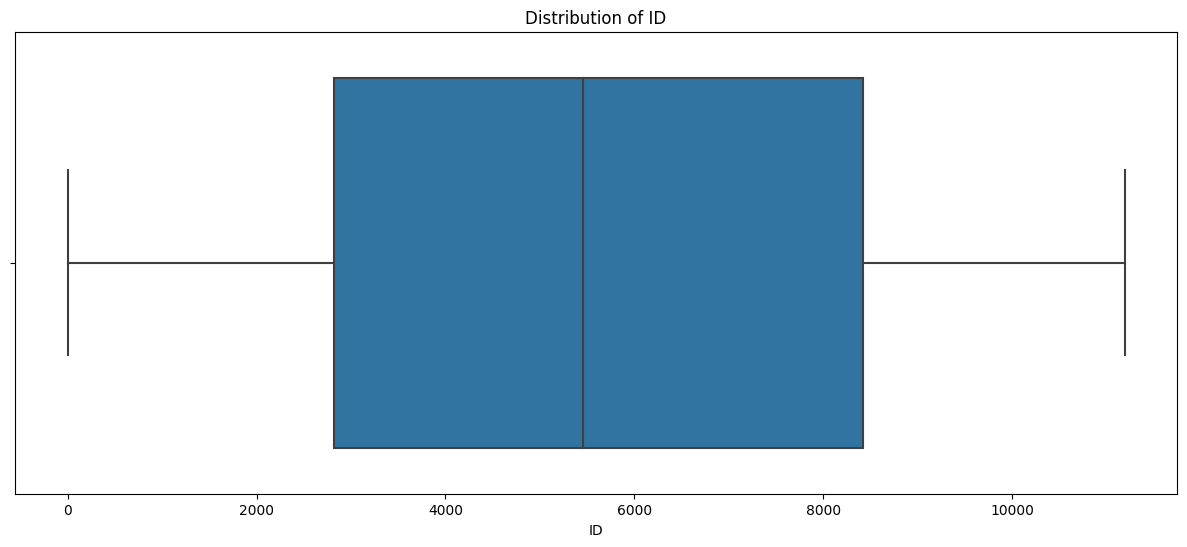

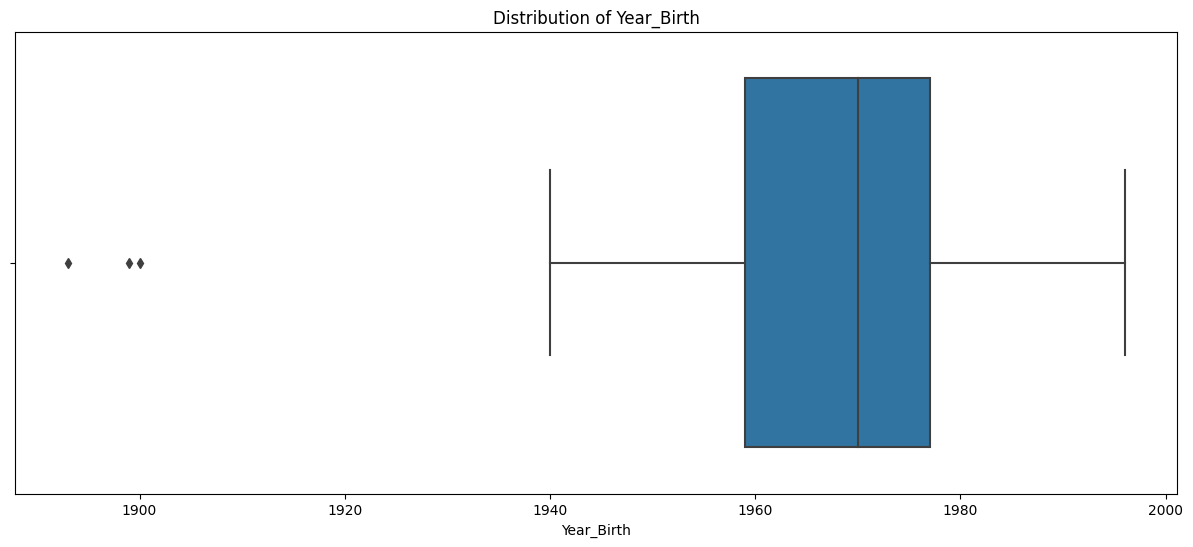

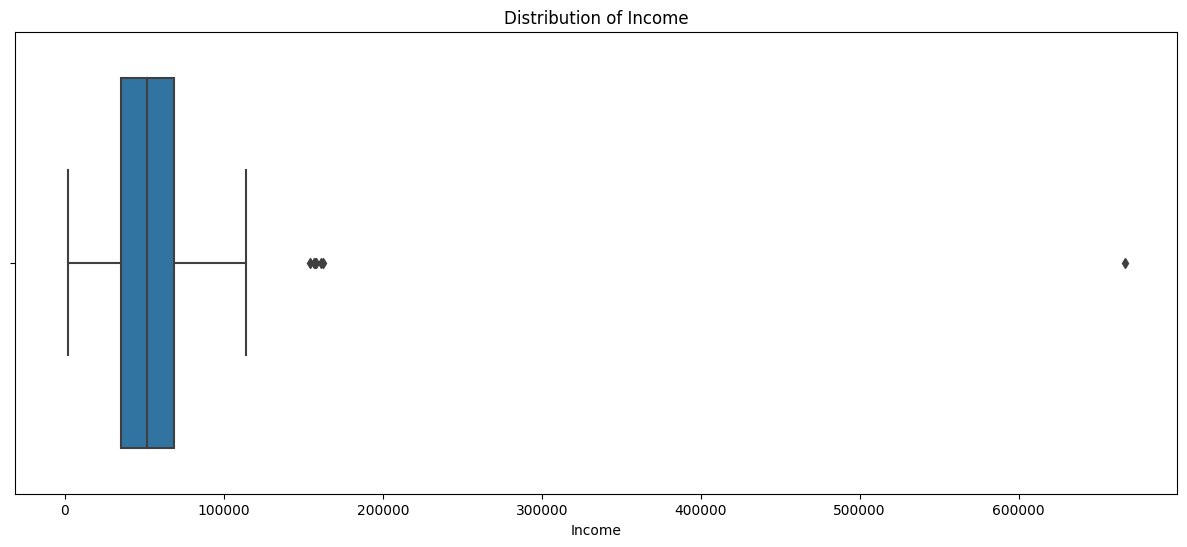

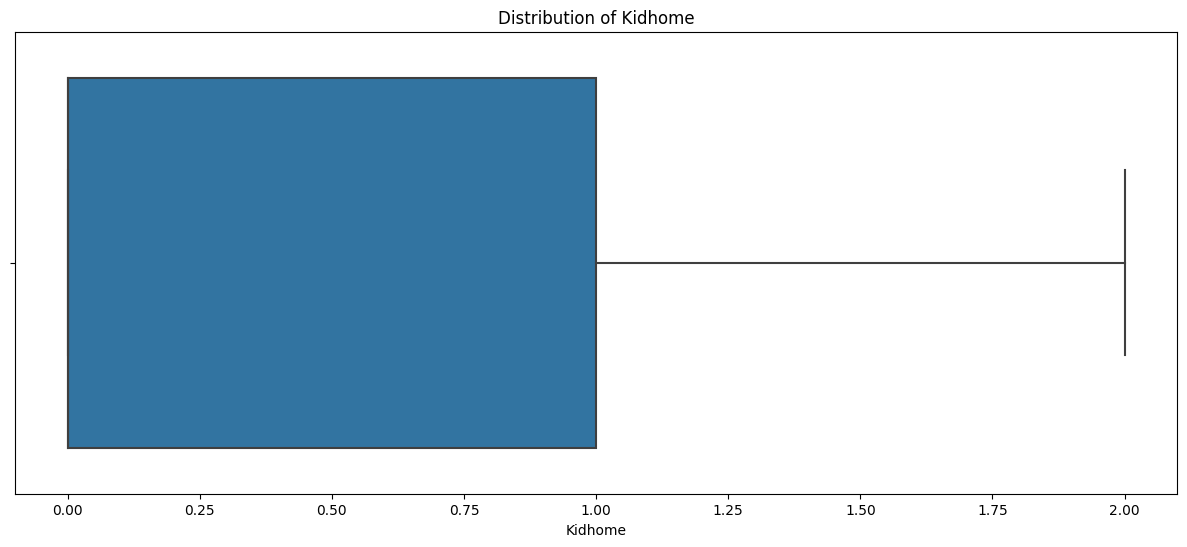

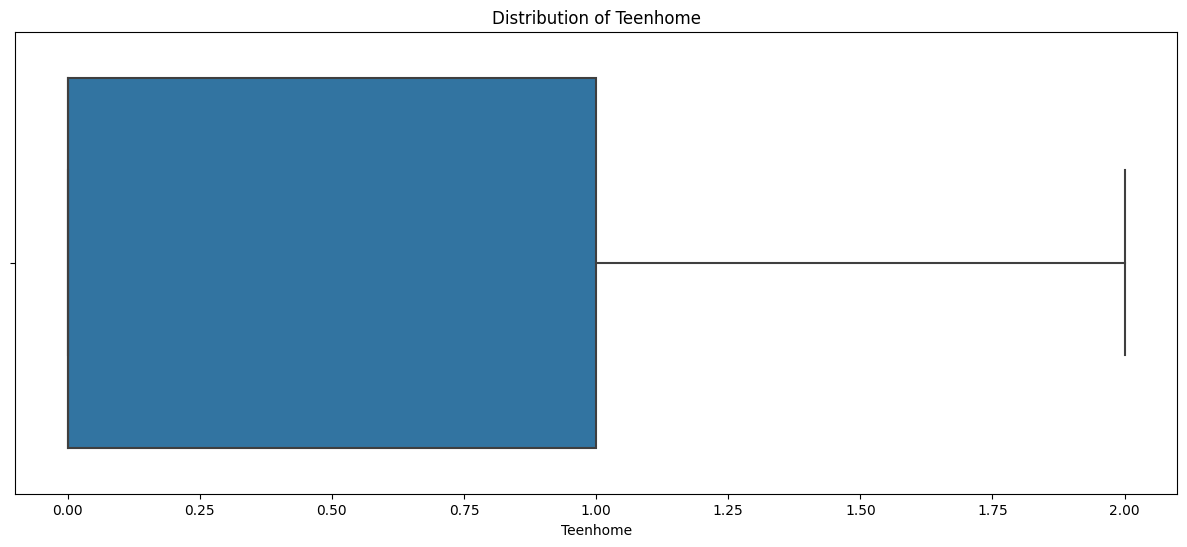

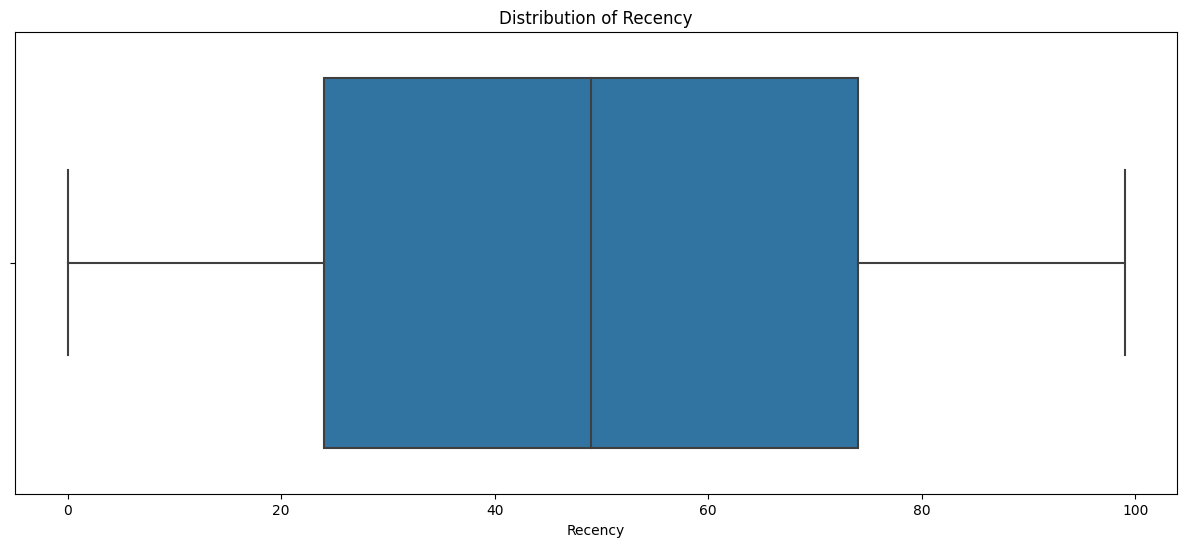

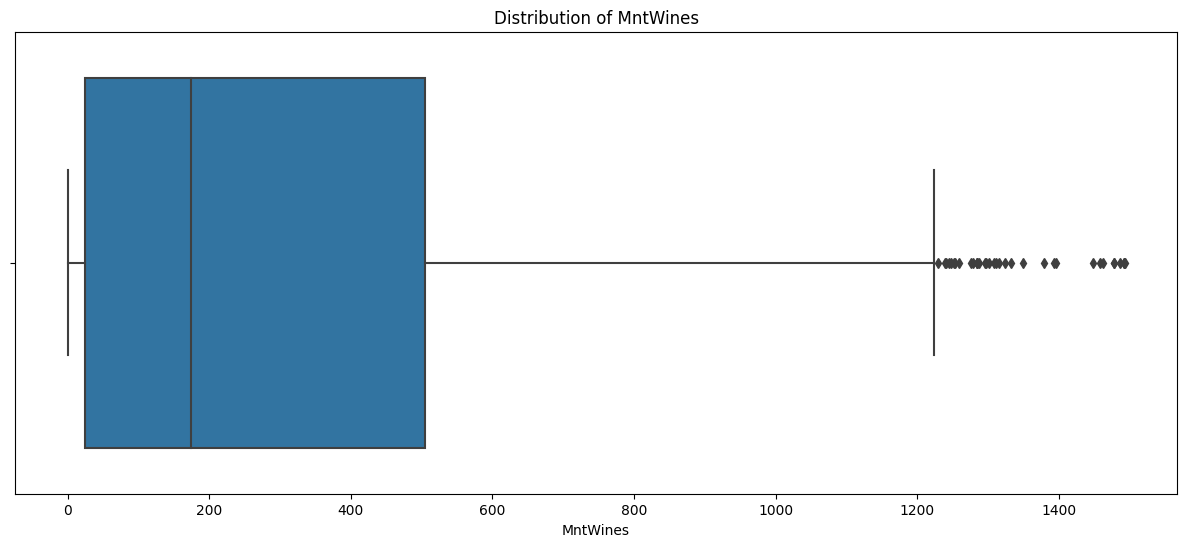

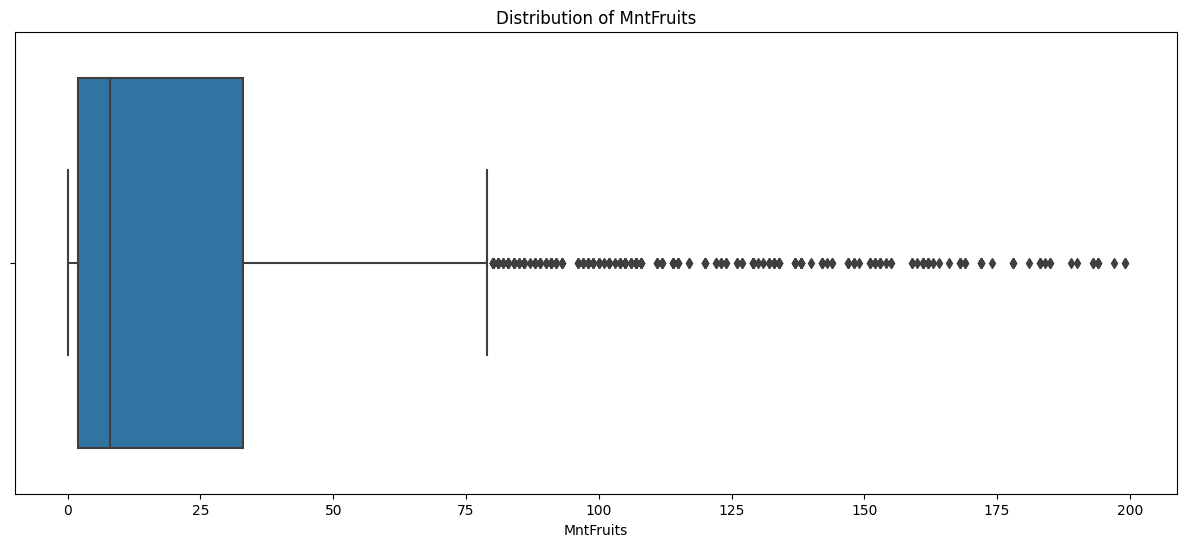

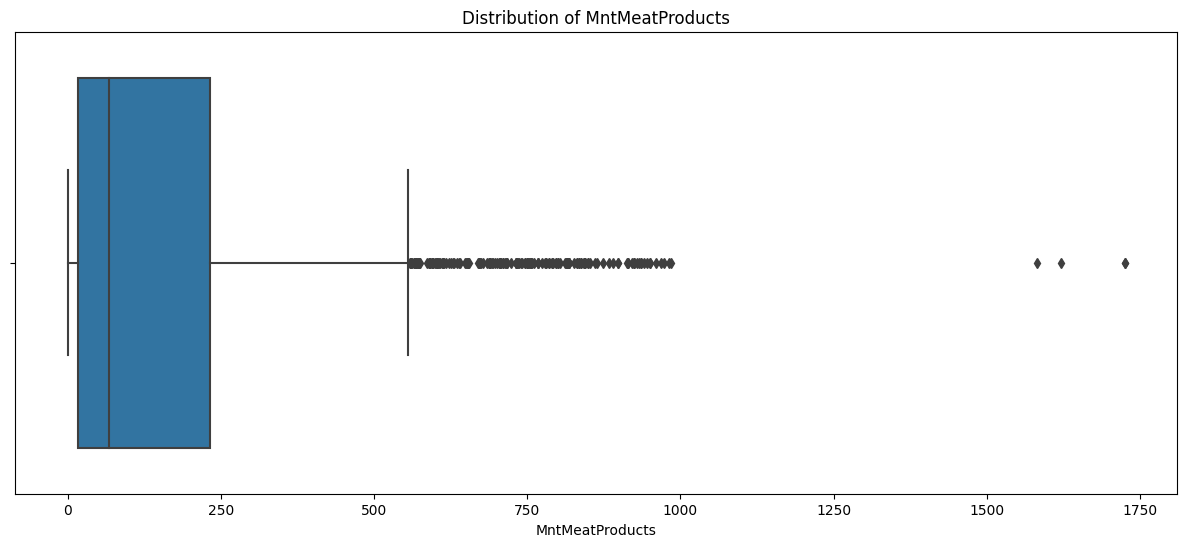

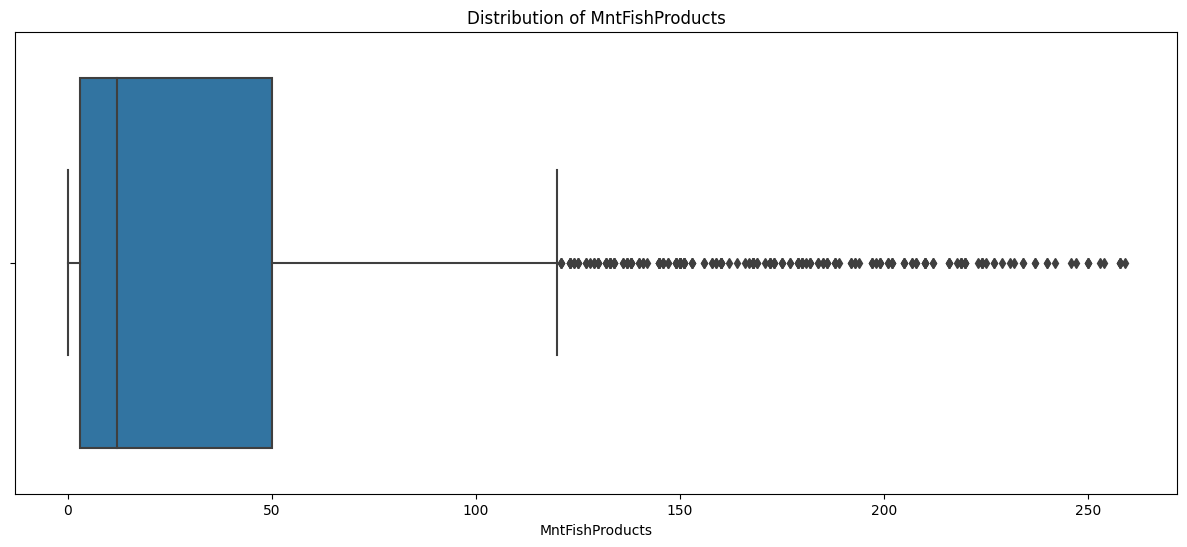

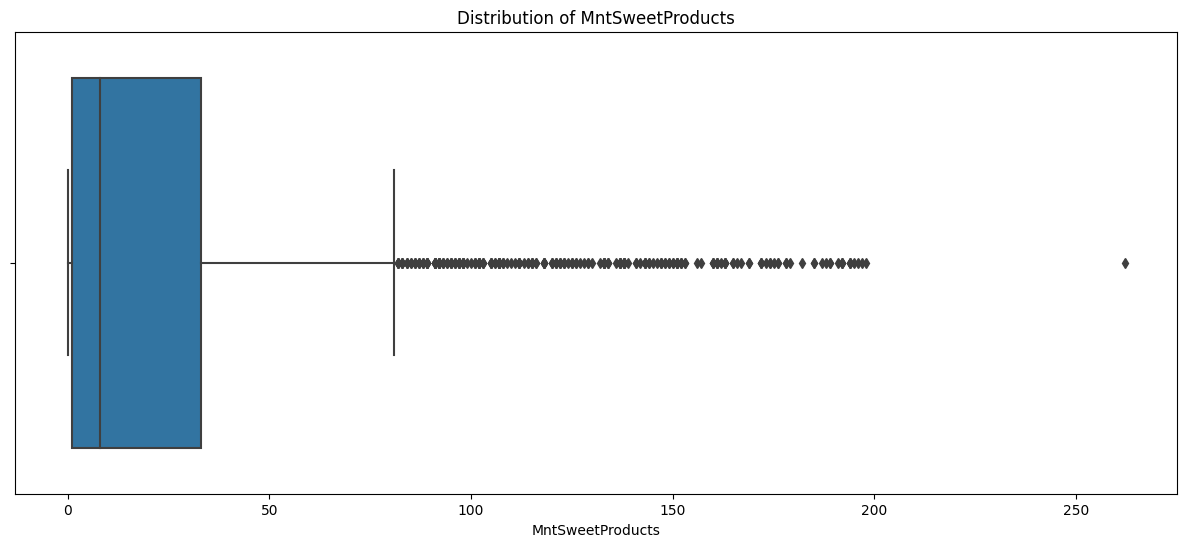

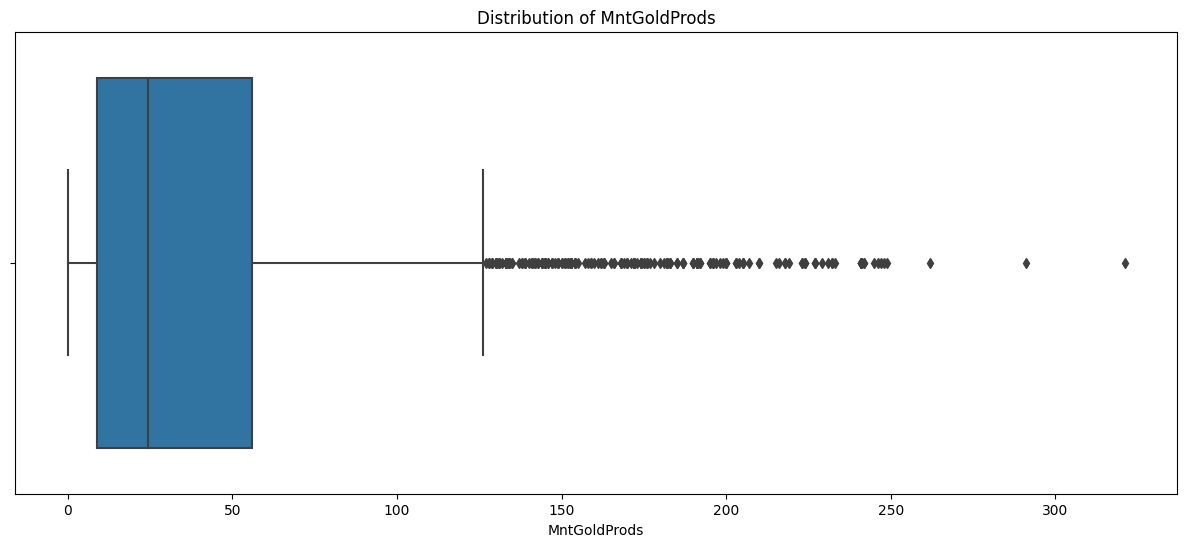

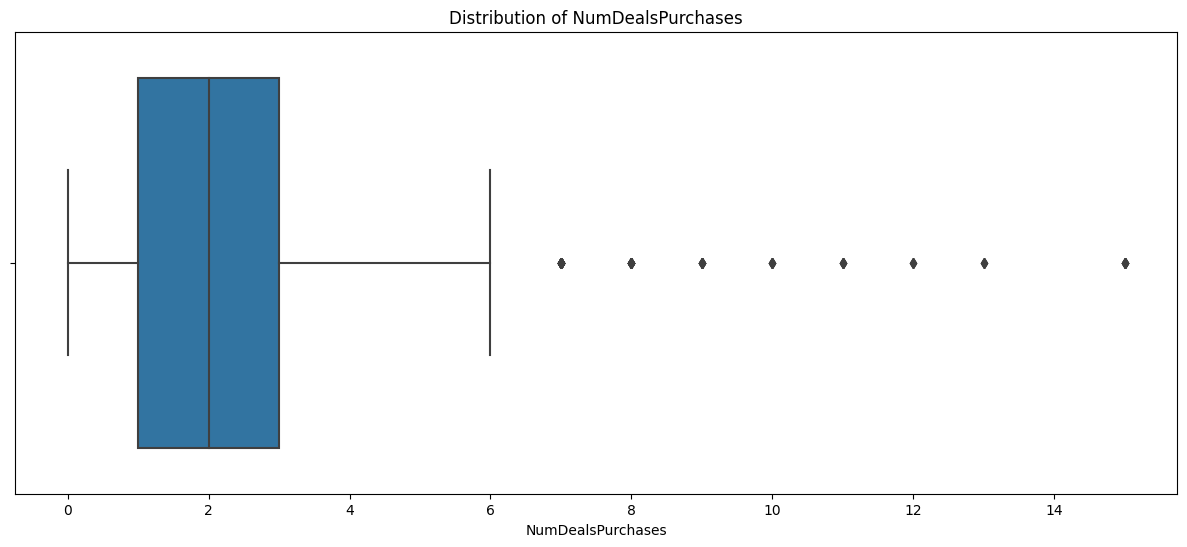

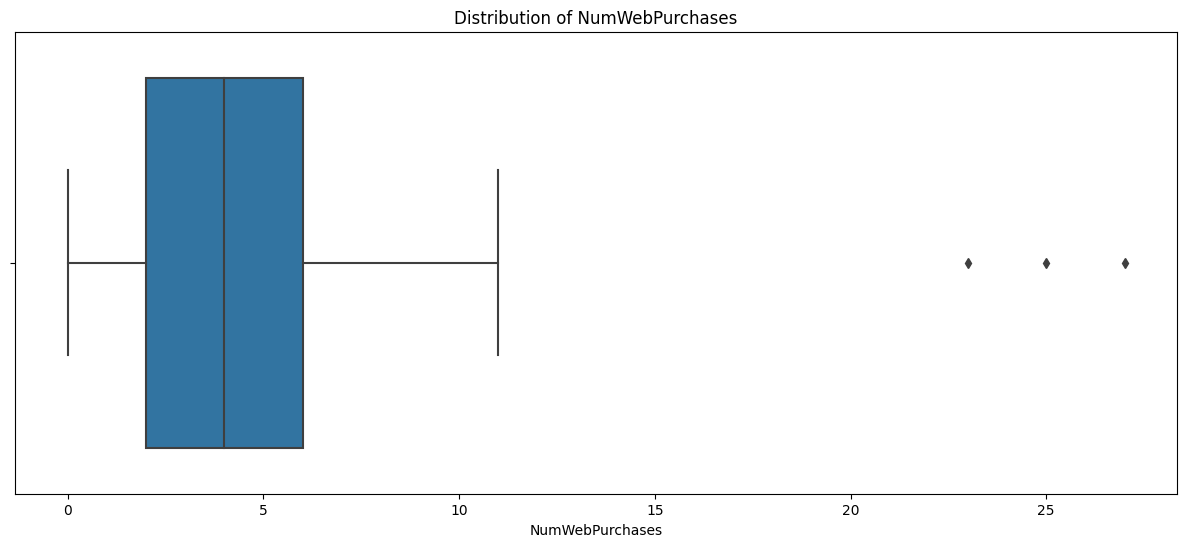

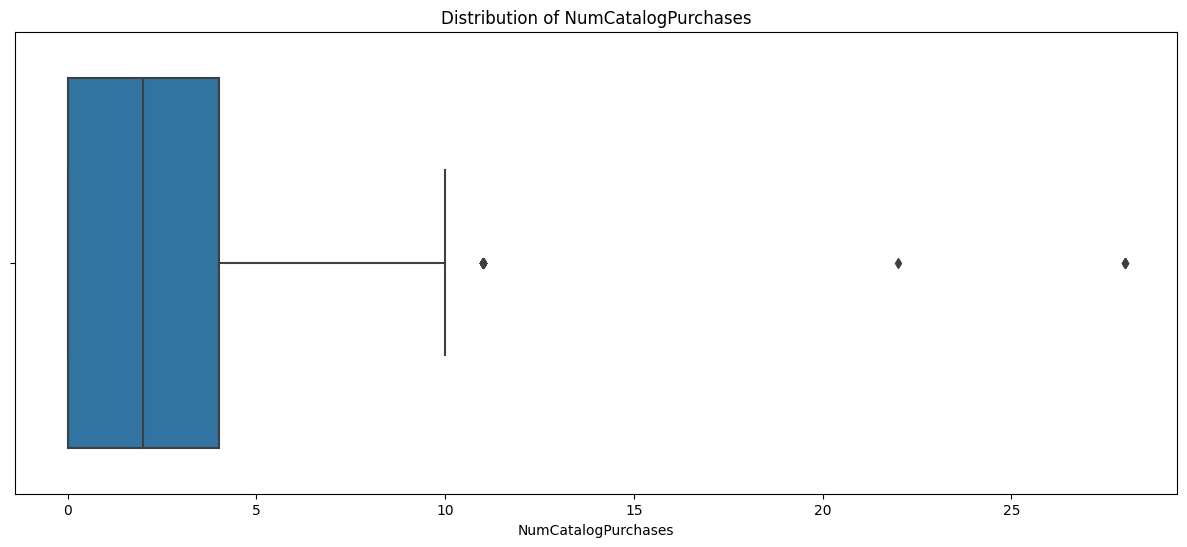

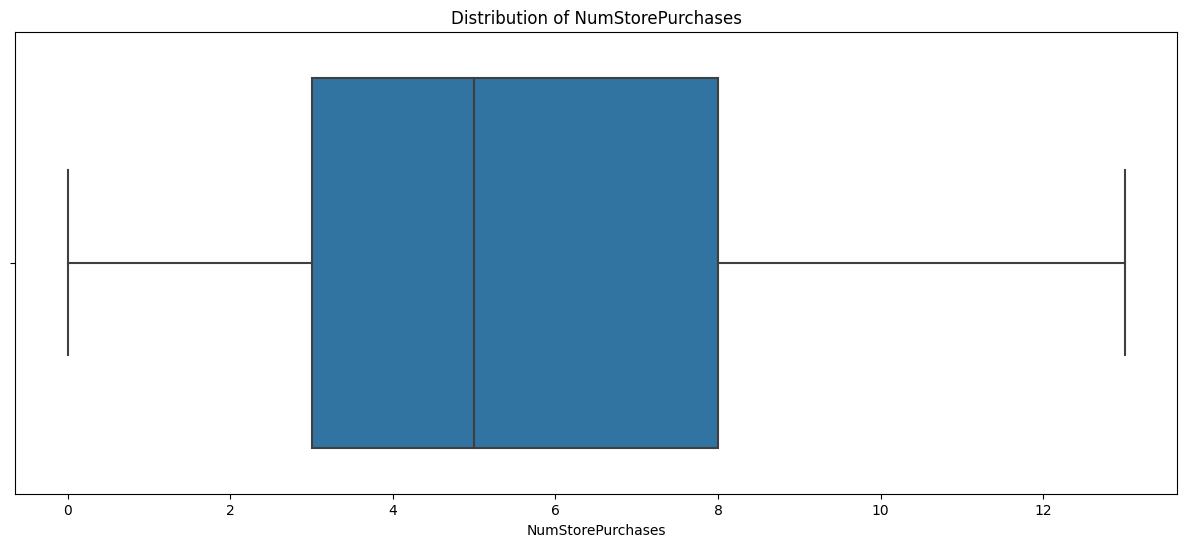

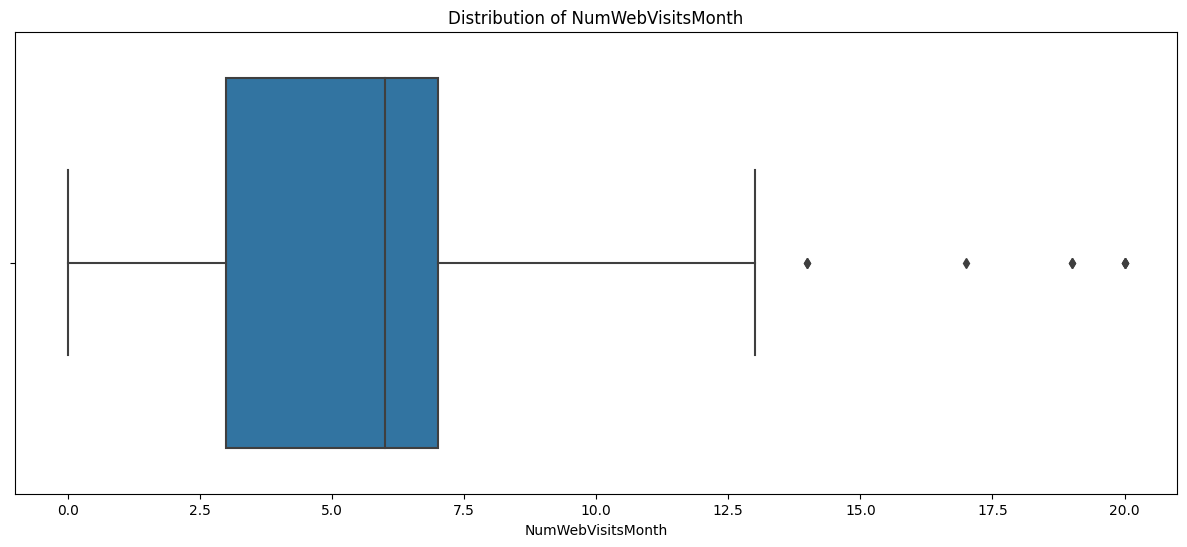

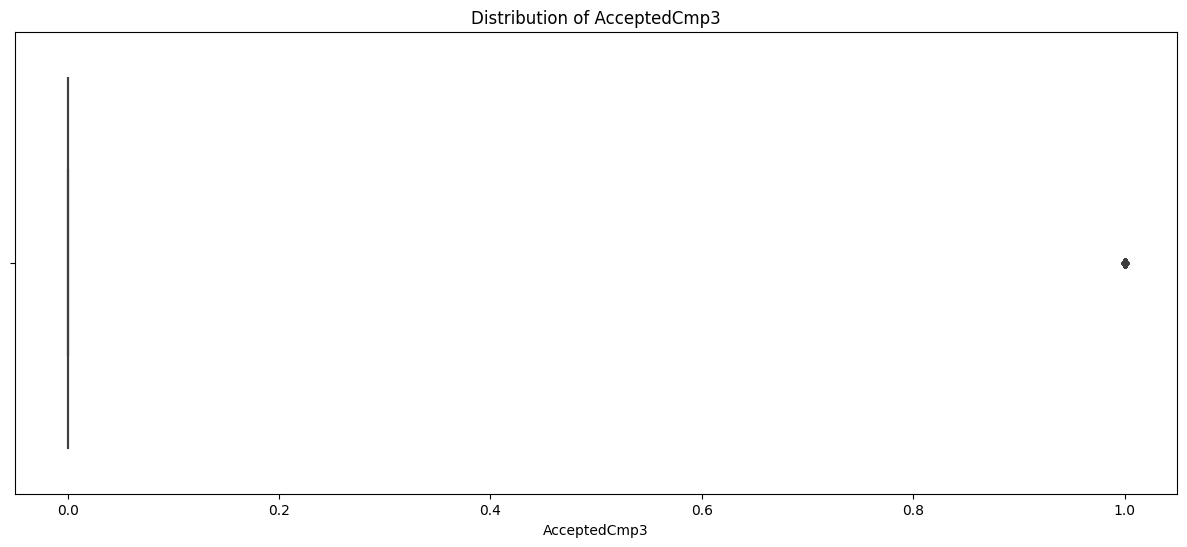

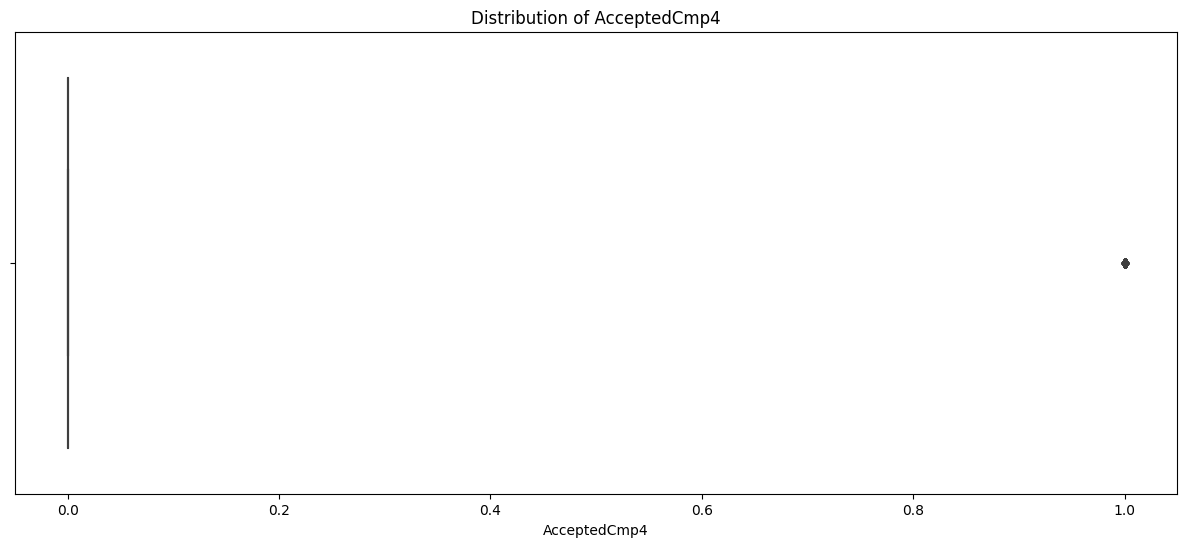

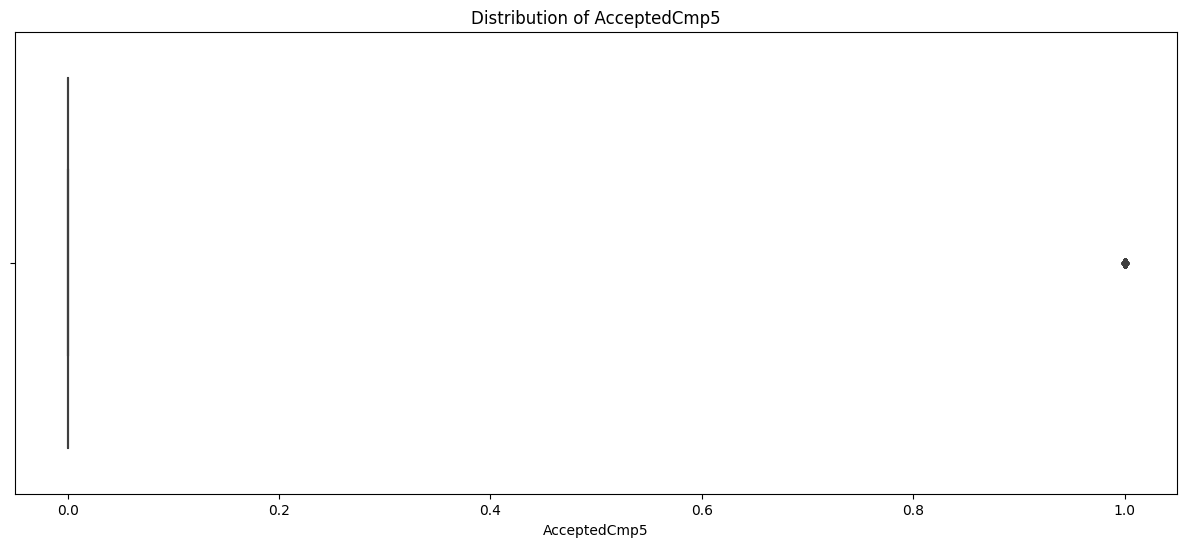

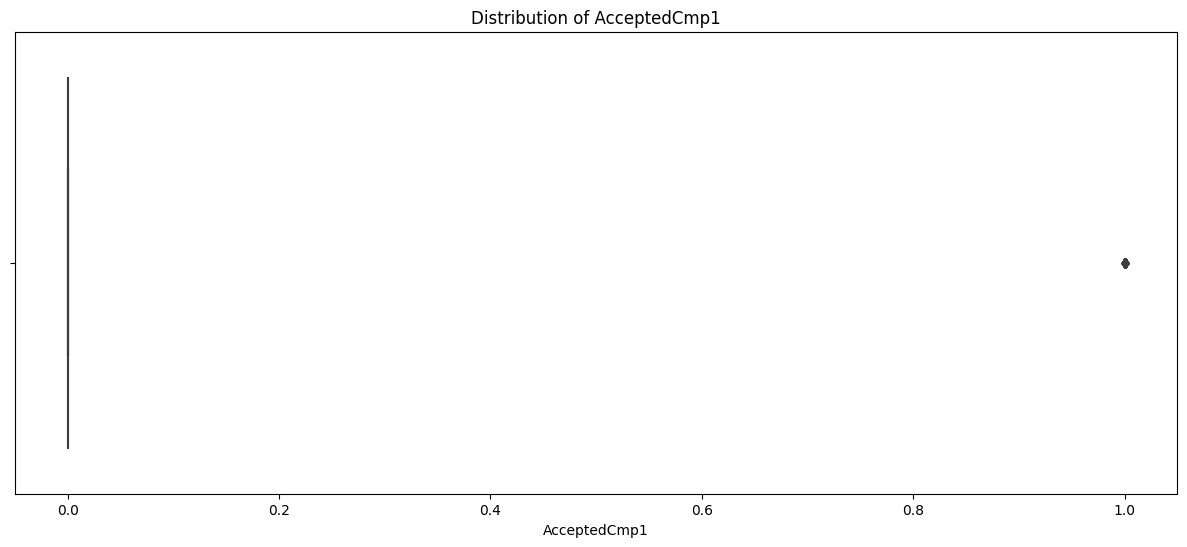

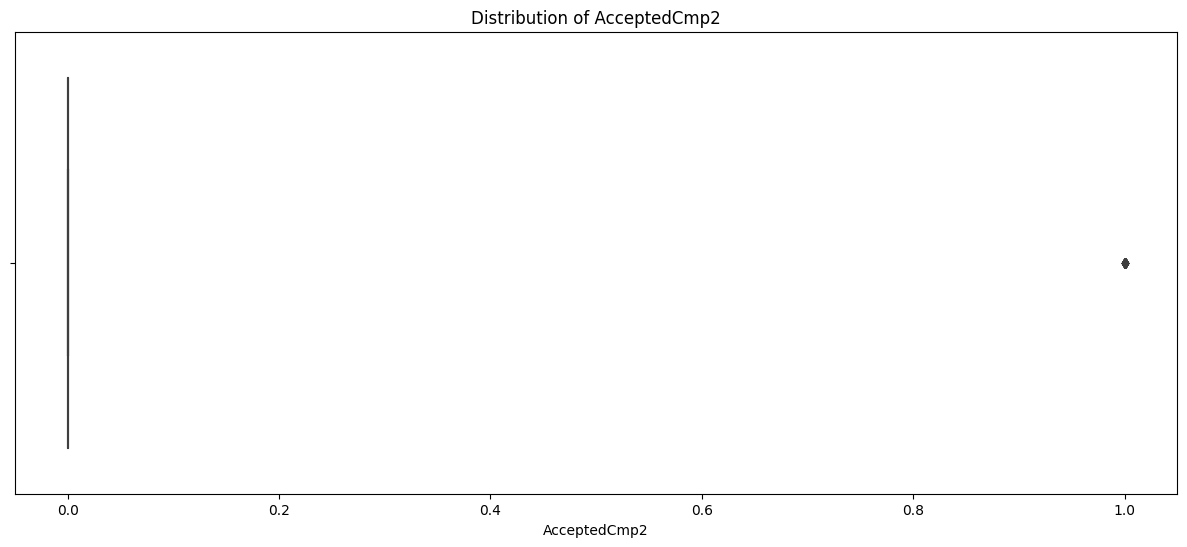

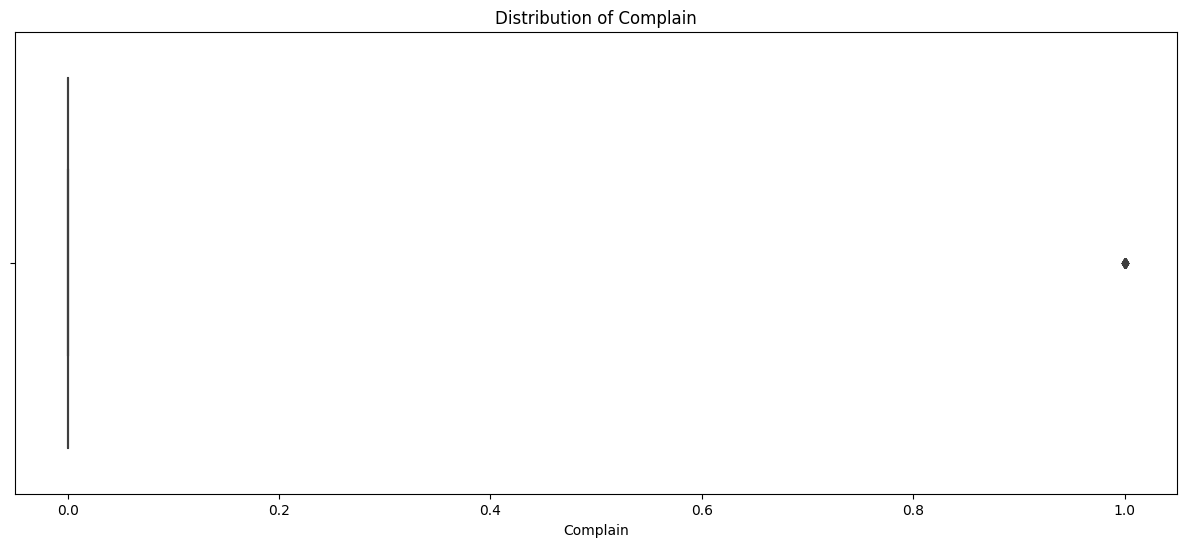

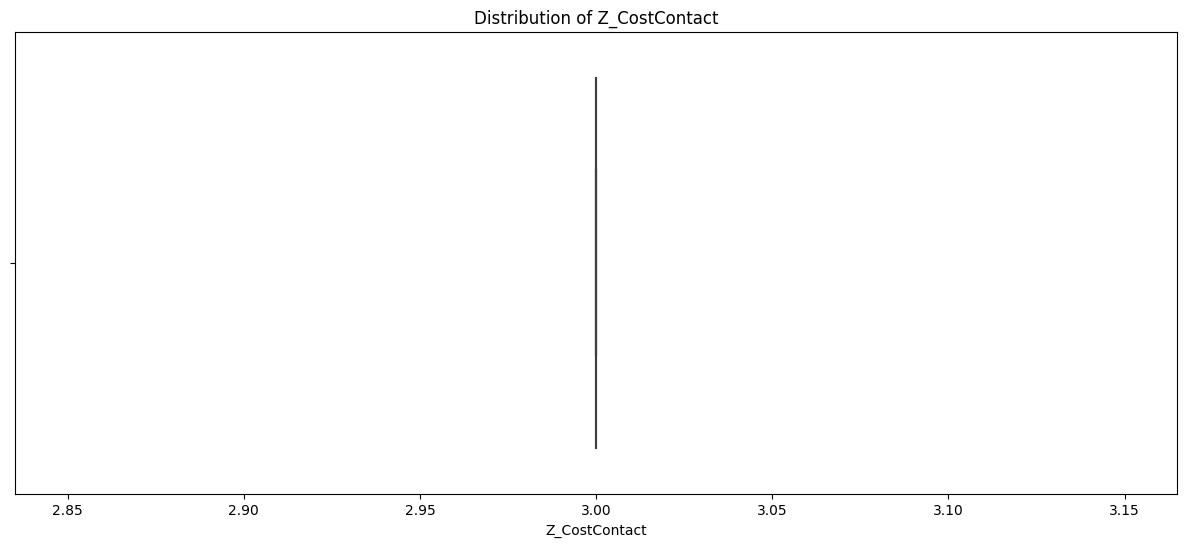

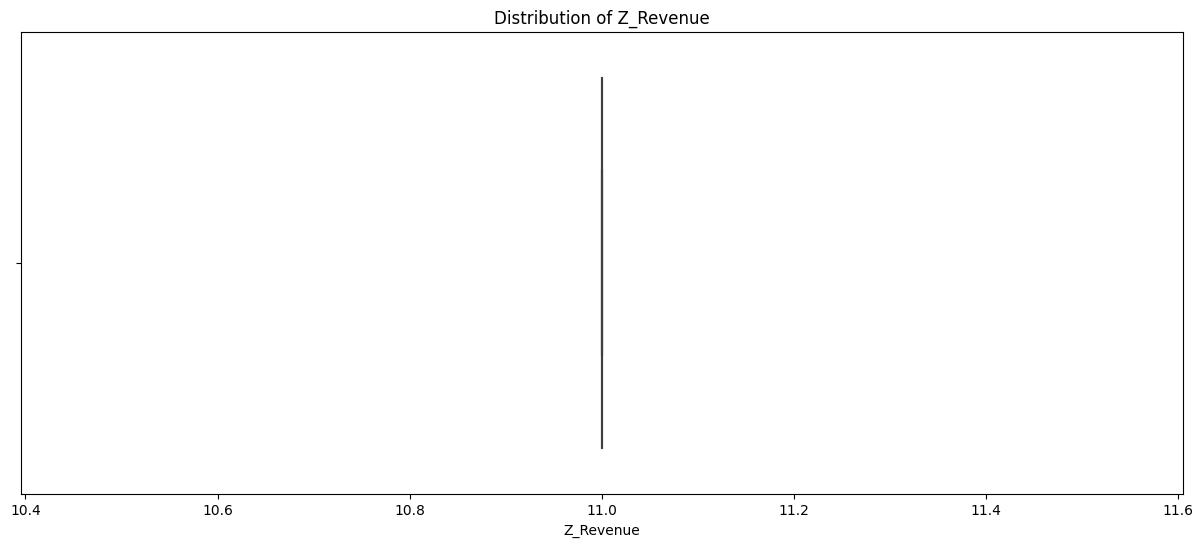

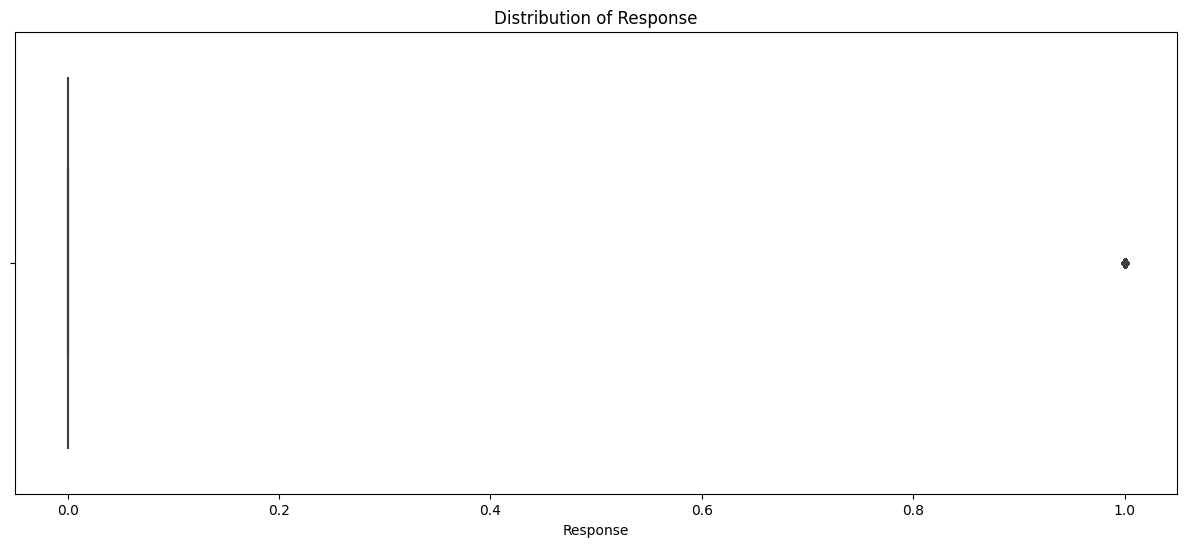

In [550]:
df1 = df.select_dtypes([int, float])
for i, col in enumerate(df1.columns):
    plt.figure(i, figsize=(15,6))
    sns.boxplot(x=col, data=df1).set_title(f'Distribution of {col}')

In [551]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [552]:
df.Income = df.Income.replace(666666, 6600)

In [553]:
# Print the updated shape of the dataframe
print("Updated shape of the dataframe:", df.shape)

Updated shape of the dataframe: (2216, 29)


Text(0.5, 1.0, 'Distribution of Income')

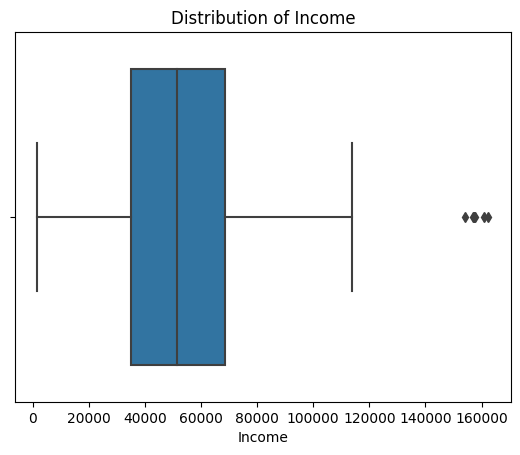

In [554]:
# Plot the distribution of a column to visualize the outliers
sns.boxplot(x=df['Income']).set_title('Distribution of Income')

In [555]:
df.loc[df.Income>120000, 'Income']=np.median(df.Income)

In [556]:
df.Income.value_counts()

7500.0     12
51371.0     7
35860.0     4
48432.0     3
18690.0     3
           ..
51124.0     1
74250.0     1
40760.0     1
41452.0     1
52869.0     1
Name: Income, Length: 1968, dtype: int64

Text(0.5, 1.0, 'Distribution of Income')

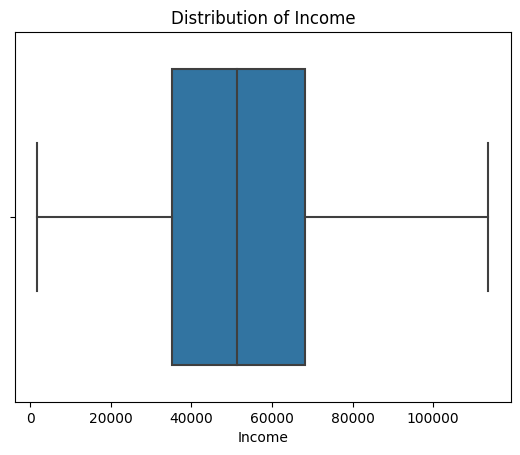

In [557]:
# Plot the distribution of a column to visualize the outliers
sns.boxplot(x=df['Income']).set_title('Distribution of Income')

In [558]:
df.Year_Birth.value_counts()

1976    89
1971    86
1975    83
1972    78
1978    76
1970    75
1965    74
1973    72
1969    70
1974    69
1956    55
1979    53
1958    52
1977    52
1952    52
1968    51
1966    50
1959    50
1954    49
1960    49
1955    48
1982    44
1963    44
1962    44
1967    44
1951    42
1983    41
1986    41
1957    41
1964    41
1980    39
1981    38
1984    38
1961    35
1953    35
1985    32
1949    30
1989    29
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     6
1995     5
1993     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

In [559]:
df.Year_Birth = df.Year_Birth.replace(1900, 1940)\
.replace (1899, 1949)\
.replace (1893, 1943)

Text(0.5, 1.0, 'Distribution of Year_Birth')

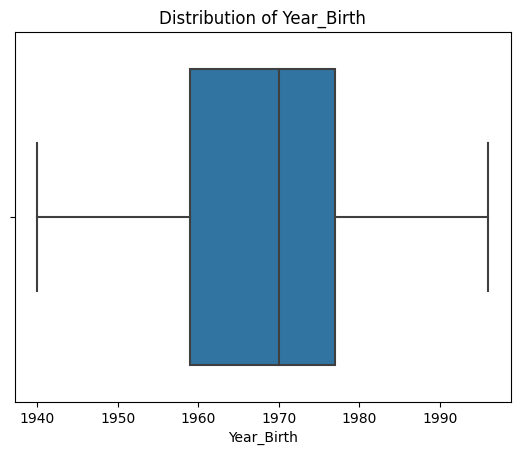

In [560]:
# Plot the distribution of a column to visualize the outliers
sns.boxplot(x=df['Year_Birth']).set_title('Distribution of Year_Birth')

# Feature engineering

### Creating new features/columns

In [561]:
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital_Status'].unique())


Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [562]:
df.Education.value_counts()/df.shape[0]

Graduation    0.503610
PhD           0.217058
Master        0.164711
2n Cycle      0.090253
Basic         0.024368
Name: Education, dtype: float64

In [563]:
def education_level(education):
   if education in ['Graduation', 'PhD', 'Master']:
       return 'High'
   elif education in ['Basic']:
       return 'Basic'
   else:
       return 'Middle'

df['Education_Level'] = df['Education'].apply(education_level)


In [564]:
df.Education_Level.value_counts()/df.shape[0]

High      0.885379
Middle    0.090253
Basic     0.024368
Name: Education_Level, dtype: float64

In [565]:
df.Marital_Status.value_counts()/df.shape[0]

Married     0.386733
Together    0.258574
Single      0.212545
Divorced    0.104693
Widow       0.034296
Alone       0.001354
Absurd      0.000903
YOLO        0.000903
Name: Marital_Status, dtype: float64

In [566]:
def living_status(marital_status):
    if marital_status in ['Alone','Divorced', 'Widow', 'Single']:
        return 'Living Alone'
    elif marital_status in ['Married', 'Together']:
        return 'Living with Others'
    else:
        return 'Unknown'

df['Living_Status'] = df['Marital_Status'].apply(living_status)


In [567]:
df.Living_Status.value_counts()/df.shape[0]

Living with Others    0.645307
Living Alone          0.352888
Unknown               0.001805
Name: Living_Status, dtype: float64

#### Creating Age

<Axes: xlabel='Age', ylabel='Count'>

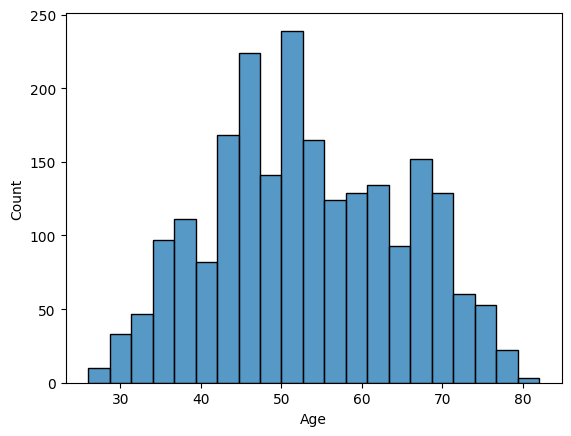

In [568]:
df['Age'] = 2022 - df['Year_Birth']
sns.histplot(df.Age)

#### Creating Total number of campaigns accepted

In [569]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


#### Creating Average spend per purchase:


In [570]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']


#### Creating Spent

In [571]:
df['Spent'] = df['MntWines']+df["MntWines"] +df['MntFruits']+ df['MntMeatProducts'] +df['MntFishProducts']+df['MntSweetProducts']+ df['MntGoldProds']


#### Creating  "Is_Parent" to indicate parenthood status:

In [572]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0)


#### Creating total spending in the last 2 years || average monthly visits to the company's website ||  ratio of online purchases to total purchases

In [573]:
# create new feature for total spending in the last 2 years
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# create new feature for average monthly visits to the company's website
df['avg_web_visits'] = df['NumWebVisitsMonth'] / 12

# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])


#### Dropping non relevant Columns/Features

In [574]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'ID']
df = df.drop(to_drop, axis=1)

In [575]:
df.dtypes

Year_Birth                    int64
Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                         

# Exploratory data analysis

### Distribution of Income


<Axes: xlabel='Income', ylabel='Count'>

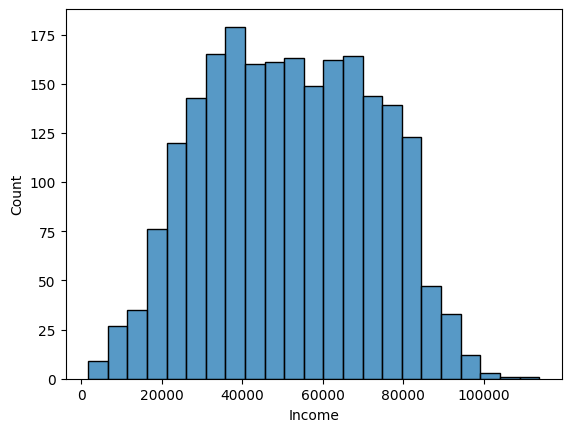

In [576]:
sns.histplot(df.Income)

### Distribution of Age

### Marital Status Distribution

<Axes: xlabel='Living_Status', ylabel='Count'>

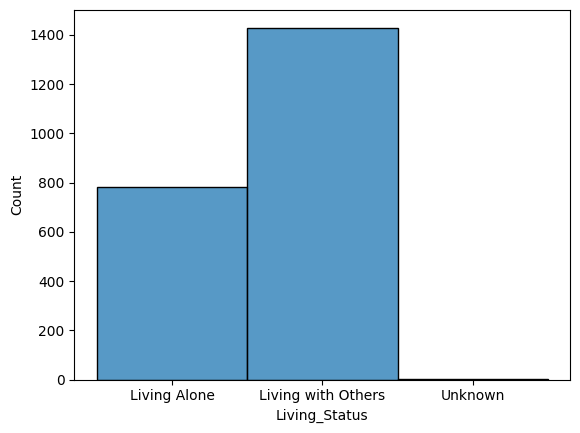

In [577]:
sns.histplot(df.Living_Status)

### Education Level Distribution

<Axes: xlabel='Education_Level', ylabel='Count'>

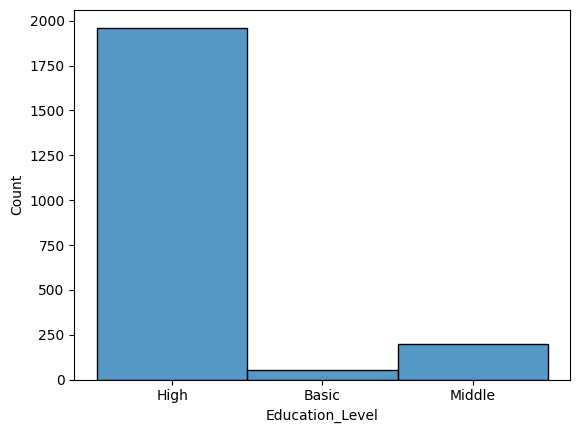

In [578]:
sns.histplot(df.Education_Level )

### Average Spend by Marital Status

<Axes: xlabel='Living_Status', ylabel='Average_Spend'>

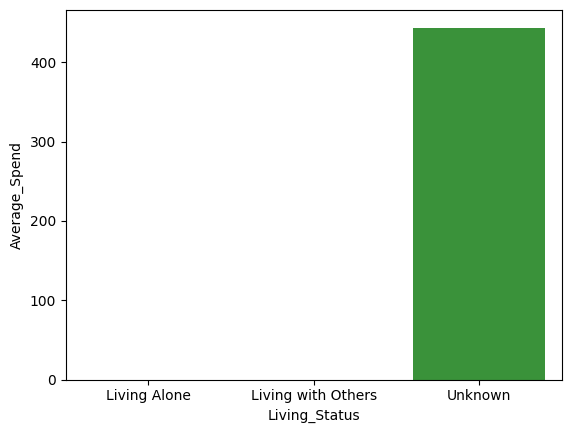

In [579]:
df_plot = df.groupby(['Living_Status']).agg({'Average_Spend': np.mean}).reset_index()
sns.barplot(df_plot, x='Living_Status', y='Average_Spend')

In [580]:
df_plot

,Living_Status,Average_Spend
0,Living Alone,NaN
1,Living with Others,NaN
2,Unknown,443.816667


In [581]:
df[df.Average_Spend == np.inf]['NumDealsPurchases'][:3]

77     0
116    0
124    0
Name: NumDealsPurchases, dtype: int64

In [582]:
df['NumDealsPurchases_m'] = df['NumDealsPurchases'].map(lambda x: max(1, x))

In [583]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases_m']

<Axes: xlabel='Living_Status', ylabel='Average_Spend'>

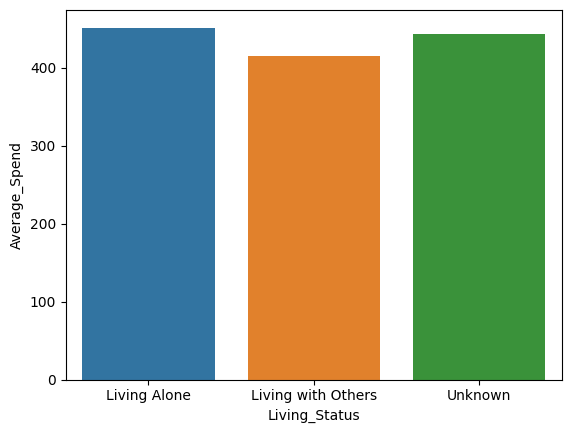

In [584]:
df_plot = df.groupby(['Living_Status']).agg({'Average_Spend': np.mean}).reset_index()
sns.barplot(df_plot, x='Living_Status', y='Average_Spend')

### Average Spend by Education Level


<Axes: xlabel='Education_Level', ylabel='Average_Spend'>

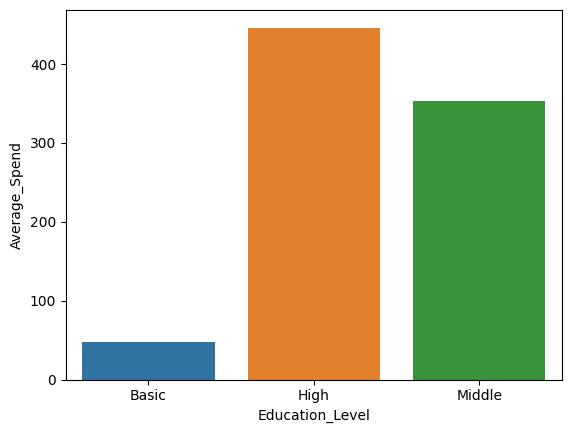

In [585]:
df_plot = df.groupby(['Education_Level']).agg({'Average_Spend': np.mean}).reset_index()
sns.barplot(df_plot, x='Education_Level', y='Average_Spend')


### the distribution of number of children in household

<Axes: xlabel='Kidhome', ylabel='Count'>

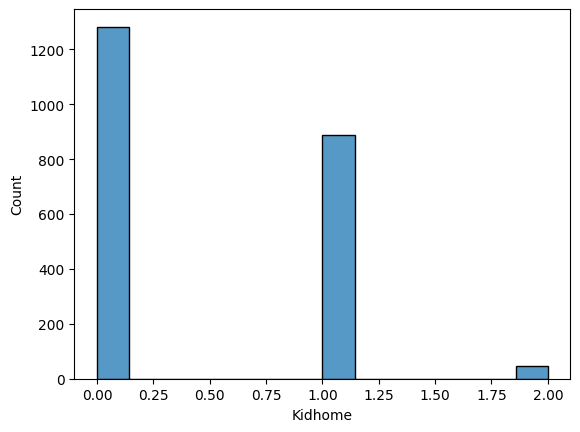

In [586]:
sns.histplot(df.Kidhome)

### the distribution of number of teenagers in household

<Axes: xlabel='Teenhome', ylabel='Count'>

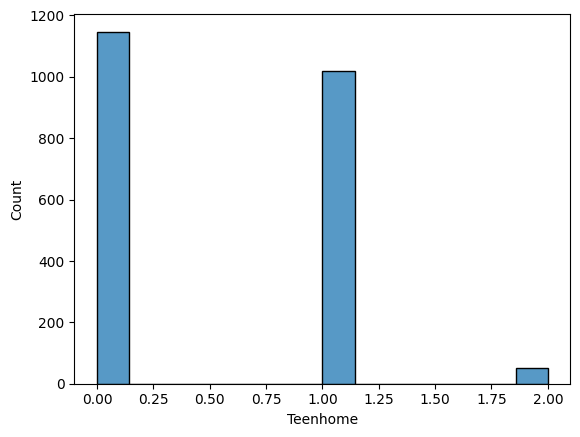

In [587]:
sns.histplot(df.Teenhome)

### "Total Campaigns Accepted Distribution"

"Total Campaigns Accepted Distribution", we are plotting a histogram of the Total_Campaigns_Accepted column. This plot will show us the distribution of the number of campaigns accepted by each customer.

Text(0.5, 1.0, 'Total Campaigns Accepted Distribution')

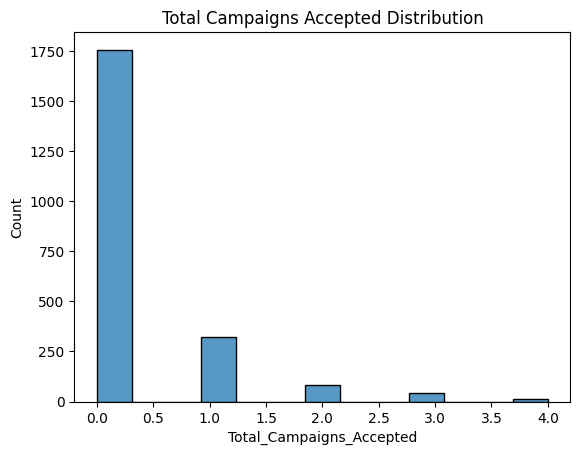

In [588]:
sns.histplot(df.Total_Campaigns_Accepted).set_title("Total Campaigns Accepted Distribution")

 ### "Average Spend per Purchase Distribution"

 "Average Spend per Purchase Distribution", we are plotting a histogram of the Average_Spend column. This plot will show us the distribution of the average spend per purchase made by each customer.

Text(0.5, 1.0, 'Total Campaigns Accepted Distribution')

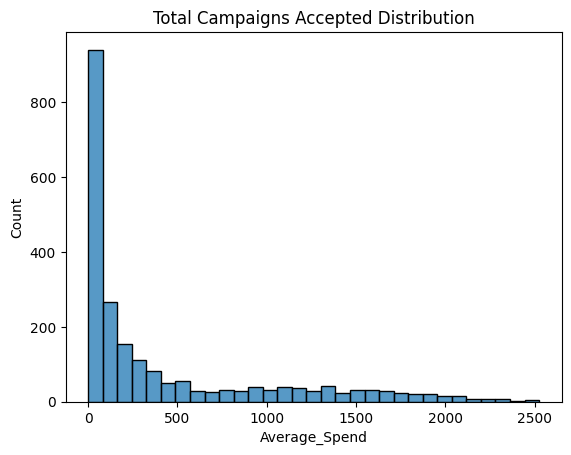

In [589]:
sns.histplot(df.Average_Spend).set_title("Total Campaigns Accepted Distribution")

### Spending Distribution by Marital Status
### Spending Distribution by Education Level
### Spending Distribution by Is_Parent

Text(0.5, 1.0, 'Marital_Status Distribution')

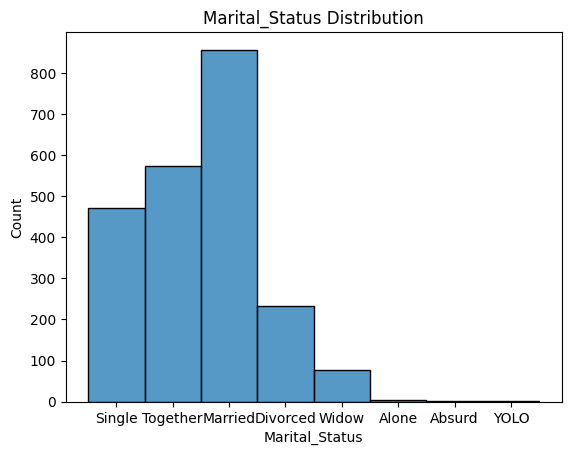

In [590]:
sns.histplot(df.Marital_Status).set_title("Marital_Status Distribution")

Text(0.5, 1.0, 'Education Distribution')

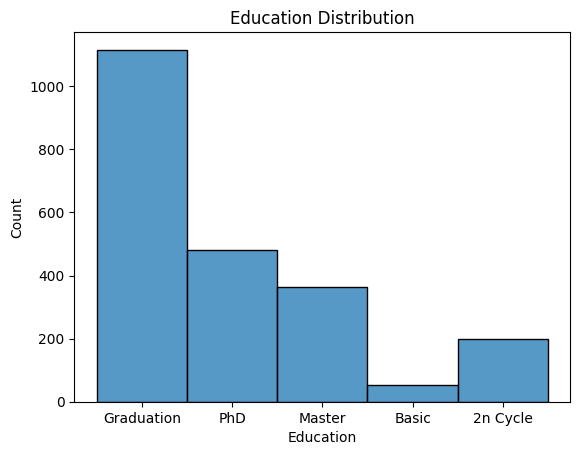

In [591]:
sns.histplot(df.Education).set_title("Education Distribution")

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'Is_Parent Distribution')

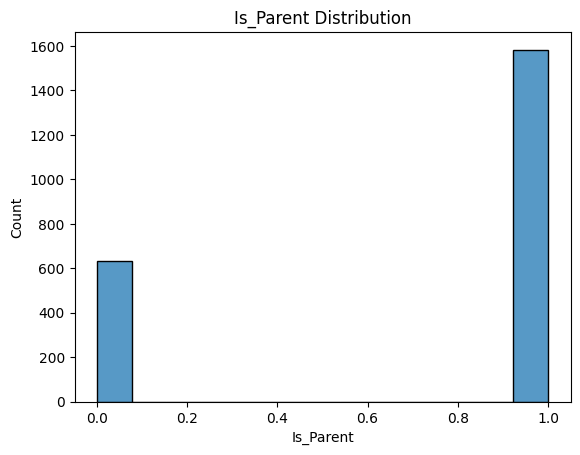

In [592]:
sns.histplot(df.Is_Parent).set_title("Is_Parent Distribution")

### the Distribution of Online Purchase Ratio

Text(0.5, 1.0, 'online_purchase_ratio Distribution')

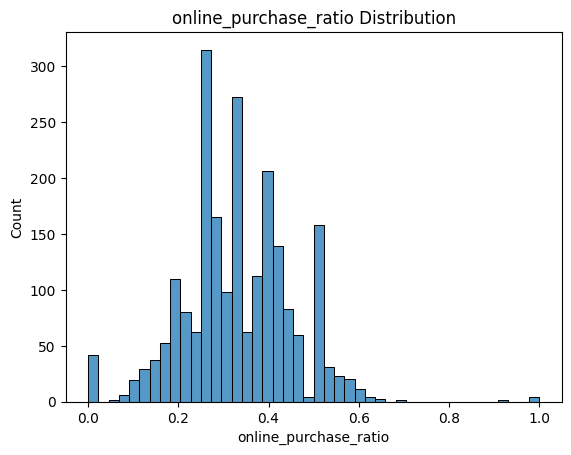

In [593]:
sns.histplot(df.online_purchase_ratio).set_title("online_purchase_ratio Distribution")

Text(0.5, 1.0, 'NumWebVisitsMonth Distribution')

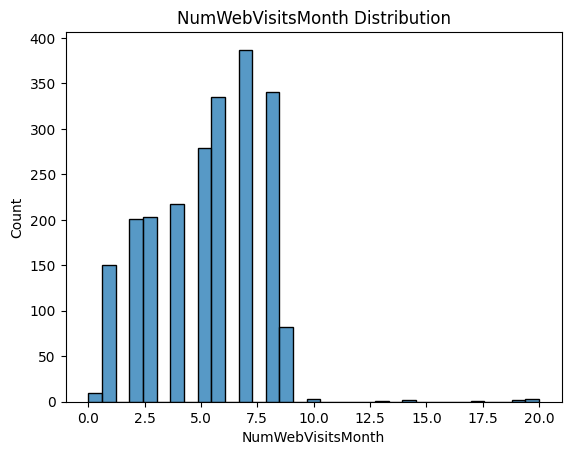

In [594]:
sns.histplot(df.NumWebVisitsMonth).set_title("NumWebVisitsMonth Distribution")

### the Distribution of Number of Web Purchases

Text(0.5, 1.0, 'NumWebPurchases Distribution')

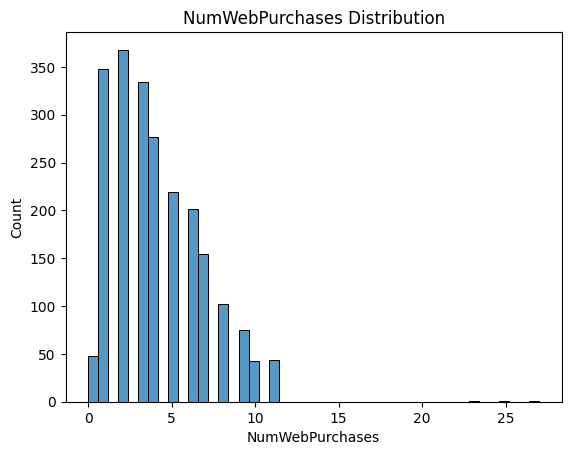

In [595]:
sns.histplot(df.NumWebPurchases).set_title("NumWebPurchases Distribution")

### Distribution of Number of Catalog Purchases

Text(0.5, 1.0, 'NumCatalogPurchases Distribution')

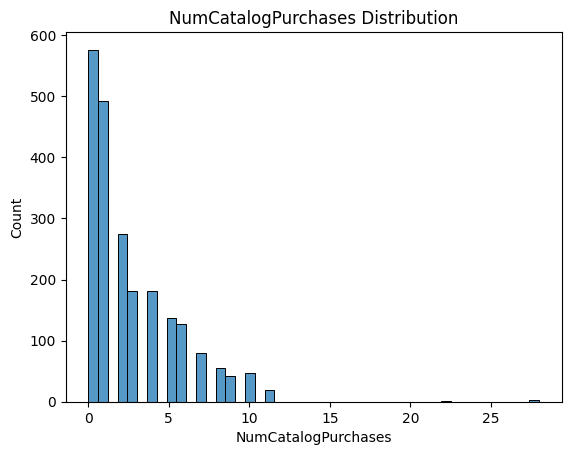

In [596]:
sns.histplot(df.NumCatalogPurchases).set_title("NumCatalogPurchases Distribution")

### Distribution of Number of Store Purchases

Text(0.5, 1.0, 'NumStorePurchases Distribution')

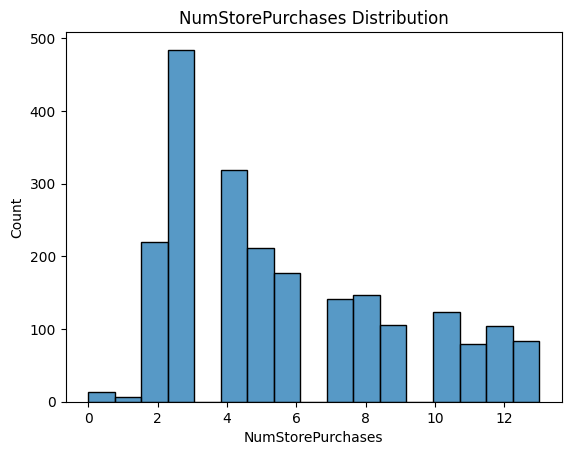

In [597]:
sns.histplot(df.NumStorePurchases).set_title("NumStorePurchases Distribution")

### "NumWebPurchases" vs "NumStorePurchases"

<Axes: xlabel='NumWebPurchases', ylabel='NumStorePurchases'>

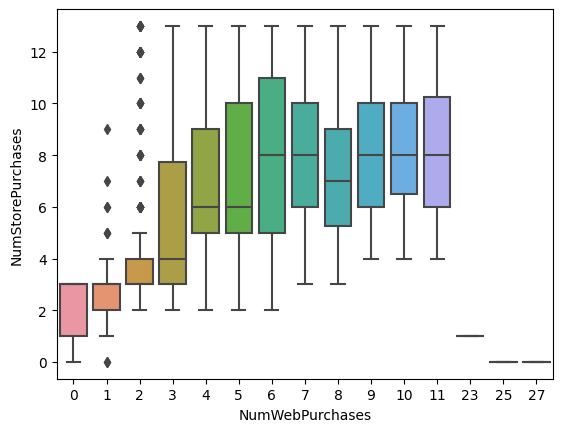

In [598]:
sns.boxplot(df, x="NumWebPurchases", y="NumStorePurchases")

###  scatter plot of "NumWebPurchases" vs "NumWebVisitsMonth"

<Axes: xlabel='NumWebPurchases', ylabel='NumWebVisitsMonth'>

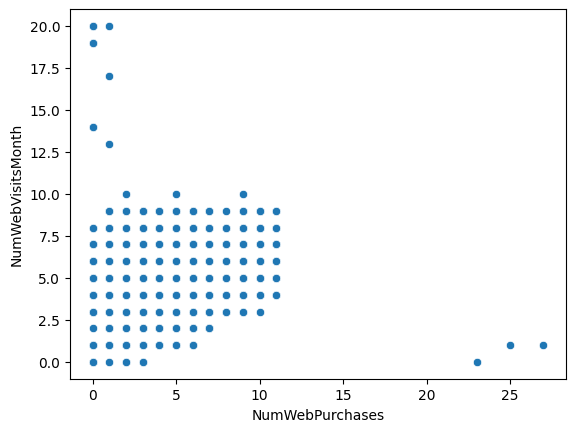

In [599]:
sns.scatterplot(data=df, x='NumWebPurchases', y='NumWebVisitsMonth')

###  Scatter plot of "MntFruits" vs "MntMeatProducts"

<Axes: xlabel='MntFruits', ylabel='MntMeatProducts'>

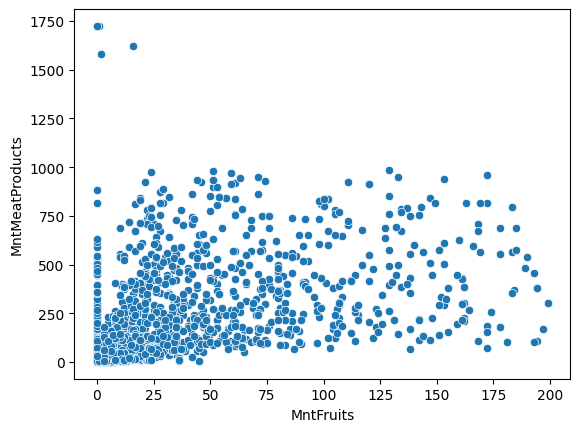

In [600]:
sns.scatterplot(data=df, x='MntFruits', y='MntMeatProducts')

###  Scatter plot of "MntWines" vs "MntSweetProducts"

<Axes: xlabel='MntWines', ylabel='MntMeatProducts'>

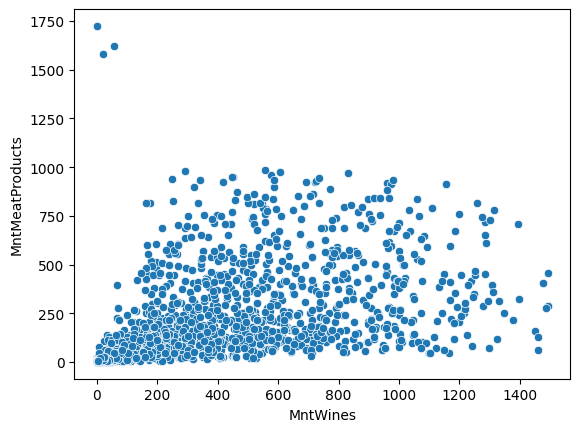

In [601]:
sns.scatterplot(data=df, x='MntWines', y='MntMeatProducts')

### Scatter plot of "MntWines" vs "MntSweetProducts" with a "Income"

<Axes: xlabel='MntWines', ylabel='MntSweetProducts'>

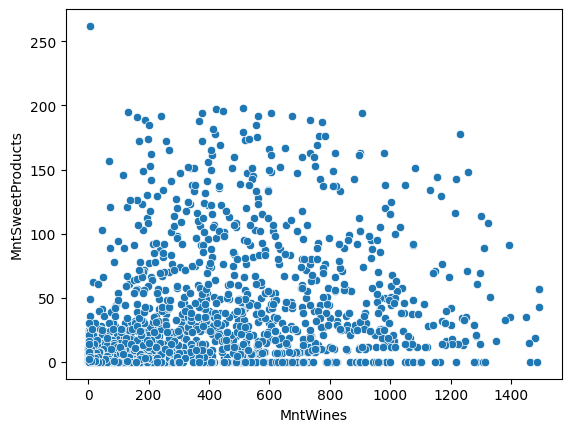

In [602]:
sns.scatterplot(data=df, x='MntWines', y='MntSweetProducts')

###  Violin plot of "AcceptedCmp1" vs "AcceptedCmp2"
###  Violin plot of "AcceptedCmp3" vs "AcceptedCmp4"


A violin plot is a type of box plot that shows the probability density of the data at different values. The violin plot shows the distribution of the data, including the median, quartiles, and the distribution of the data. In this case, we are using the violin plot to see if there is a relationship between the two campaigns (AcceptedCmp1 vs AcceptedCmp2 and AcceptedCmp3 vs AcceptedCmp4). If there is a relationship between the two campaigns, then the violin plots will show similar shapes and distributions, indicating that the customers who accepted one campaign are likely to accept the other campaign as well.

<Axes: xlabel='AcceptedCmp1', ylabel='AcceptedCmp2'>

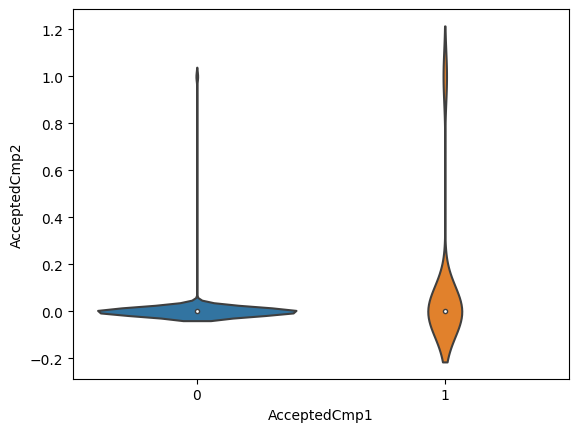

In [603]:
sns.violinplot(df, x="AcceptedCmp1", y="AcceptedCmp2", box=True, points="all")


<Axes: xlabel='AcceptedCmp3', ylabel='AcceptedCmp4'>

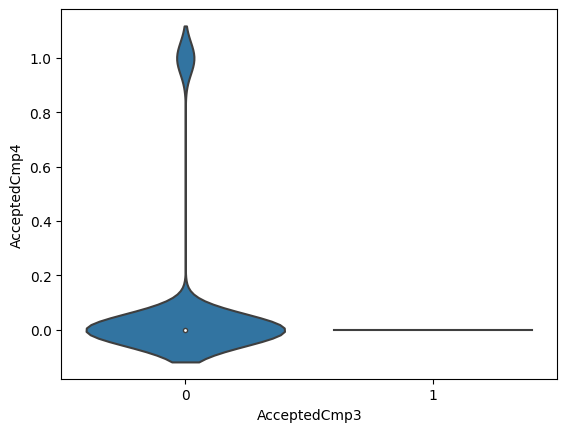

In [604]:
sns.violinplot(df, x="AcceptedCmp3", y="AcceptedCmp4", box=True, points="all")

###  Scatter plot of "NumDealsPurchases" vs "NumCatalogPurchases"

<Axes: xlabel='NumDealsPurchases', ylabel='NumCatalogPurchases'>

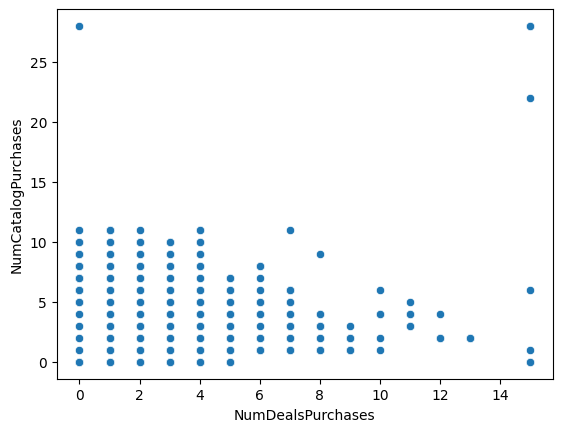

In [605]:
sns.scatterplot(data=df, x='NumDealsPurchases', y='NumCatalogPurchases')

###  Pairplot of "Income", "NumWebPurchases", and "NumStorePurchases"

In [606]:
#sns.pairplot(df.loc[:, ["Income", "NumWebPurchases", "NumStorePurchases"]])

In [607]:
df.dtypes

Year_Birth                    int64
Education                    object
Marital_Status               object
Income                      float64
Kidhome                       int64
Teenhome                      int64
Recency                       int64
MntWines                      int64
MntFruits                     int64
MntMeatProducts               int64
MntFishProducts               int64
MntSweetProducts              int64
MntGoldProds                  int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
AcceptedCmp3                  int64
AcceptedCmp4                  int64
AcceptedCmp5                  int64
AcceptedCmp1                  int64
AcceptedCmp2                  int64
Complain                      int64
Response                      int64
Education_Level              object
Living_Status                object
Age                         

# Clustering

## One-hot encoding

In [608]:
# One-hot encode the categorical variables
df = pd.get_dummies(df, columns=["Marital_Status", "Education_Level","Living_Status"])

In [616]:
df = df.drop('Education', axis=1)

## Data Scaling StandardScaler

In [617]:
# Select the numerical columns to scale
num_cols = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response',
            'total_spending', 'avg_web_visits', 'online_purchase_ratio', 'Age',
            'Total_Campaigns_Accepted', 'Is_Parent']

# Initialize the MinMaxScaler
scaler = StandardScaler()

# Fit the scaler to the numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year_Birth                        2216 non-null   int64  
 1   Income                            2216 non-null   float64
 2   Kidhome                           2216 non-null   float64
 3   Teenhome                          2216 non-null   float64
 4   Recency                           2216 non-null   float64
 5   MntWines                          2216 non-null   float64
 6   MntFruits                         2216 non-null   float64
 7   MntMeatProducts                   2216 non-null   float64
 8   MntFishProducts                   2216 non-null   float64
 9   MntSweetProducts                  2216 non-null   float64
 10  MntGoldProds                      2216 non-null   float64
 11  NumDealsPurchases                 2216 non-null   float64
 12  NumWeb

In [619]:
df.online_purchase_ratio.fillna(df.online_purchase_ratio.mean(), inplace=True)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year_Birth                        2216 non-null   int64  
 1   Income                            2216 non-null   float64
 2   Kidhome                           2216 non-null   float64
 3   Teenhome                          2216 non-null   float64
 4   Recency                           2216 non-null   float64
 5   MntWines                          2216 non-null   float64
 6   MntFruits                         2216 non-null   float64
 7   MntMeatProducts                   2216 non-null   float64
 8   MntFishProducts                   2216 non-null   float64
 9   MntSweetProducts                  2216 non-null   float64
 10  MntGoldProds                      2216 non-null   float64
 11  NumDealsPurchases                 2216 non-null   float64
 12  NumWeb

# PCA

In [623]:
# Initialize the PCA model
pca = PCA(n_components=10)

# Fit and transform the data
df_pca = pca.fit_transform(df)


In [624]:
df_pca

array([[ 1.21292880e+03,  5.79984655e+02,  6.37635712e+00, ...,
        -2.21706811e+00, -5.47492767e-02, -1.13891556e-01],
       [-9.63876494e+02, -8.28893559e+01,  1.67538980e+01, ...,
        -6.17050537e-01, -2.86930088e-01, -3.40406674e-02],
       [ 4.25797533e+02, -1.54285780e+02,  4.41817258e+00, ...,
         8.46432180e-01, -1.04828783e+00,  2.33077829e-01],
       ...,
       [ 1.47802831e+03, -7.82743221e+01, -1.35401647e+01, ...,
         2.75552606e-01,  2.85344298e-01, -1.57088257e-01],
       [ 3.06587105e+02,  1.86678480e+02,  1.13382947e+01, ...,
         1.73682974e-01, -1.20402559e+00,  3.01651307e-01],
       [-7.53528420e+02, -1.07786344e+01,  1.59664888e+01, ...,
        -6.98341425e-01, -7.78225181e-01,  1.79414019e-01]])

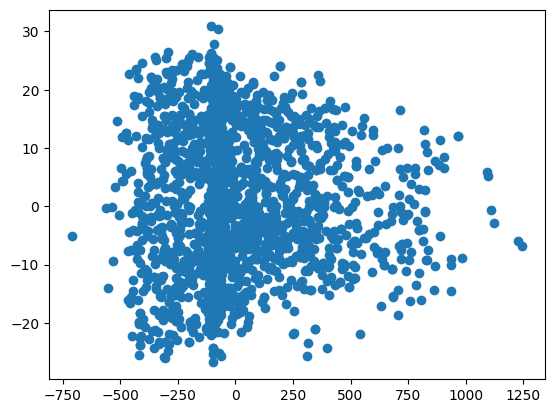

In [625]:
plt.scatter(df_pca[:,1],df_pca[:,2])
plt.show()

In [626]:
pca.explained_variance_ratio_

array([9.39175202e-01, 6.06929700e-02, 1.13833931e-04, 2.58258363e-06,
       2.25720778e-06, 1.46040504e-06, 1.21054918e-06, 1.00611571e-06,
       8.93638582e-07, 8.47637532e-07])

In [627]:
pd.DataFrame(pca.explained_variance_)

,0
0,1.103050e+06
1,7.128319e+04
2,1.336966e+02
3,3.033215e+00
4,2.651065e+00
5,1.715229e+00
6,1.421776e+00
7,1.181671e+00
8,1.049568e+00
9,9.955405e-01


# Determining the optimal number of clusters using Silhouette Score

In [628]:
list_k = list(range(2, 10))
silhouette_scores = []
for k in list_k:
    km = KMeans(n_clusters=k)
    preds = km.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, preds))

best_k = list_k[np.argmax(silhouette_scores)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [629]:
best_k

2

In [630]:
silhouette_scores

[0.6537086601405484,
 0.6203501917758237,
 0.572438447485478,
 0.594190824791373,
 0.5733092268987932,
 0.5913351970651431,
 0.5764301459287179,
 0.5689234068501772]

## Algorithms

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

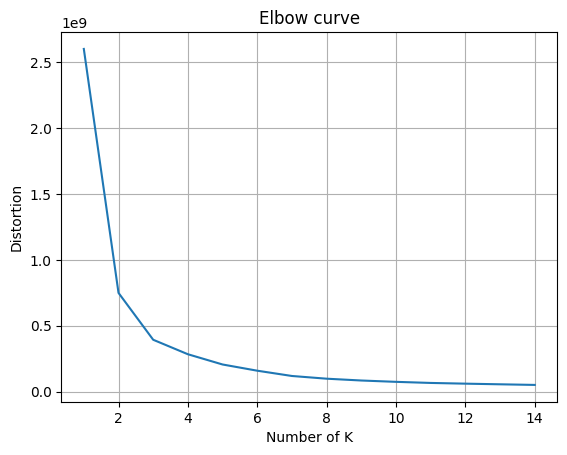

In [631]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

plt.plot(range(1, 15), distorsions)
plt.title('Elbow curve')
plt.xlabel('Number of K')
plt.ylabel('Distortion')
plt.grid()

In [632]:
d1_kmeans = KMeans(n_clusters=4).fit(df)
print(silhouette_score(df, d1_kmeans.labels_ ))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5733891579309514


In [633]:
d1_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df)
print(silhouette_score(df, d1_hier.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.5915929164547067


In [634]:
d1_dbscan = DBSCAN(eps=100, min_samples=2, metric='euclidean').fit(df)
print(silhouette_score(df, d1_dbscan.labels_))

0.2636286529425961


In [635]:
d1_dbscan.labels_

array([-1,  0,  0, ...,  0,  0,  0])

In [636]:
d1_gm = GaussianMixture(n_components=2, random_state=0).fit(df)
print(silhouette_score(df, d1_gm.predict(df)))

0.551933480421271


In [637]:
print("K-means: ",silhouette_score(df, d1_kmeans.labels_ ))
print("Hierarchical: ",silhouette_score(df, d1_hier.labels_))
print("DBSCAN: ",silhouette_score(df, d1_dbscan.labels_))
print("GM: ",silhouette_score(df, d1_gm.predict(df)))

K-means:  0.5733891579309514
Hierarchical:  0.5915929164547067
DBSCAN:  0.2636286529425961
GM:  0.551933480421271


In [638]:
silhouette_kmean = []
silhouette_hier = []
silhouette_db = []
silhouette_gm = []
for i in range(2,39):
    df_PCA = PCA(n_components = i, copy = False).fit_transform(df)

    d_kmeans = KMeans(n_clusters=4).fit(df_PCA)
    silhouette_kmean.append(round(silhouette_score(df_PCA, d_kmeans.labels_ ),4))

    d_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
    silhouette_hier.append(round(silhouette_score(df_PCA, d_hier.labels_),4))

    d_dbscan = DBSCAN(eps=0.5, min_samples=2).fit(df_PCA)
    silhouette_db.append(round(silhouette_score(df_PCA, d_dbscan.labels_),48))

    d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
    silhouette_gm.append(round(silhouette_score(df_PCA, d_gm.predict(df_PCA)),4))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_i

In [639]:
print("Kmean")
print(silhouette_kmean)
print()
print("Hierarchical")
print(silhouette_hier)
print()
print("DBSCAN")
print(silhouette_db)
print()
print("GM")
print(silhouette_gm)

Kmean
[0.5758, 0.5749, 0.5725, 0.5748, 0.5744, 0.5725, 0.5725, 0.5724, 0.5736, 0.5724, 0.5724, 0.5747, 0.5734, 0.5734, 0.5724, 0.5724, 0.5724, 0.5734, 0.5726, 0.5746, 0.5734, 0.5748, 0.5733, 0.5734, 0.5733, 0.5729, 0.5724, 0.5734, 0.5724, 0.573, 0.5724, 0.5724, 0.5747, 0.5734, 0.5724, 0.5746, 0.5747]

Hierarchical
[0.5916, 0.5902, 0.5902, 0.5902, 0.5916, 0.5916, 0.5905, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916, 0.5916]

DBSCAN
[-0.5062681284217464, -0.6009104234002899, -0.6012853524245763, -0.6330439910243523, -0.6330017603196925, -0.632973595061825, -0.6329515095325067, -0.6329033160420736, -0.6328584788296837, -0.632834579310861, -0.6328315179330756, -0.6328341540907809, -0.6359473265897094, -0.6359367729826074, -0.6359249963592971, -0.6359171111313625, -0.635892691493138, -0.6358835842339307, -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


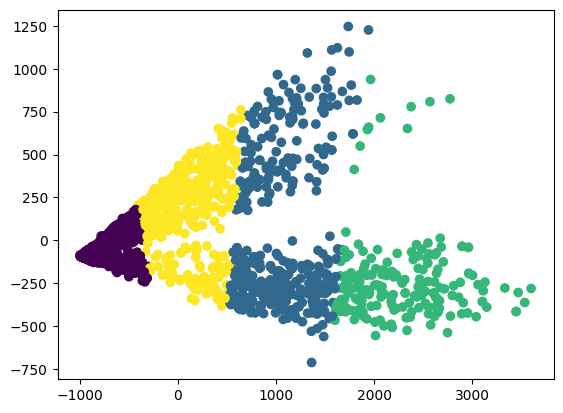

In [640]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_kmeans = KMeans(n_clusters=4).fit(df_PCA)
df_PCA['Cluster'] = d_kmeans.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


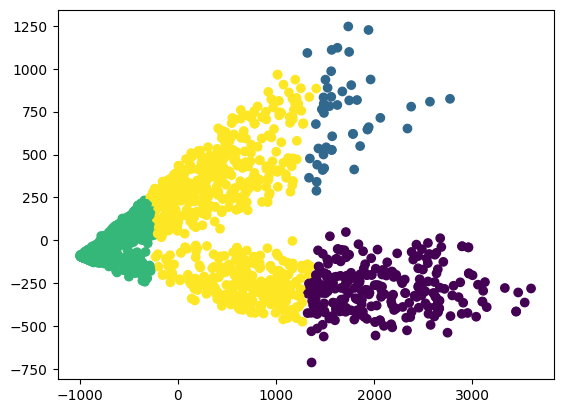

In [641]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_hier = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage= 'average').fit(df_PCA)
df_PCA['Cluster'] = d_hier.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

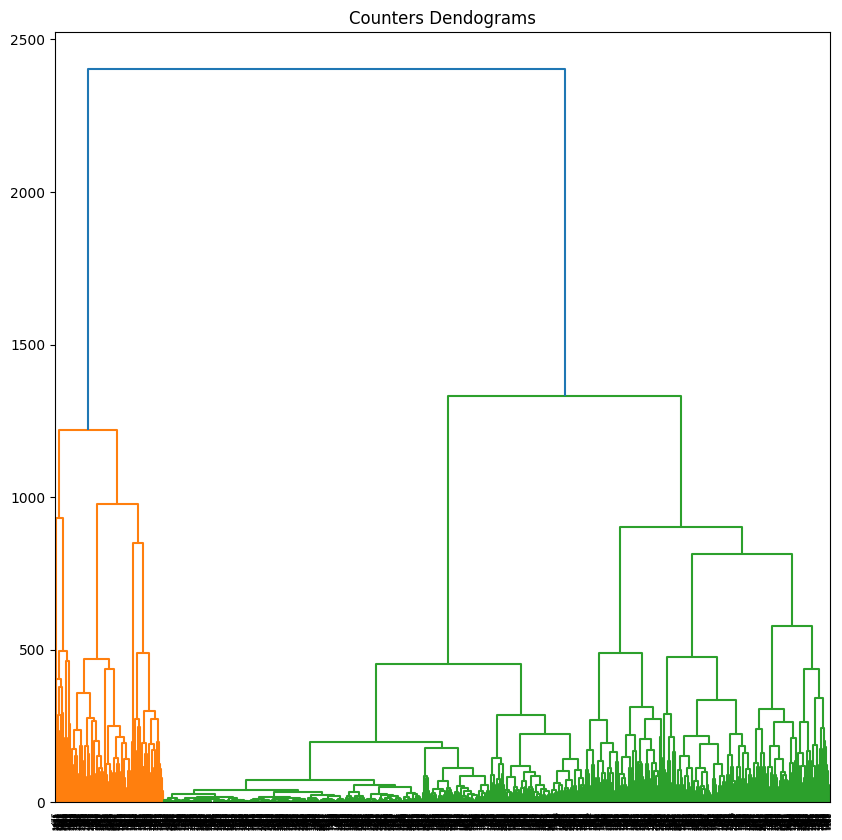

In [642]:
plt.figure(figsize=(10, 10))
plt.title("Counters Dendograms")
dend_avg = shc.dendrogram(shc.linkage(y=df_PCA , method='average',metric='euclidean')
                          ,orientation='top')

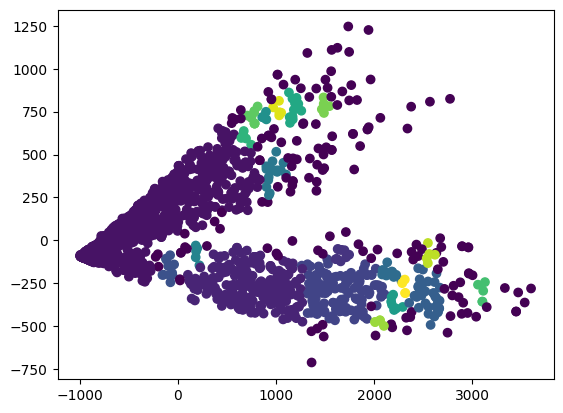

In [643]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_dbscan = DBSCAN(eps=70, min_samples=5).fit(df_PCA)
df_PCA['Cluster'] = d_dbscan.labels_

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

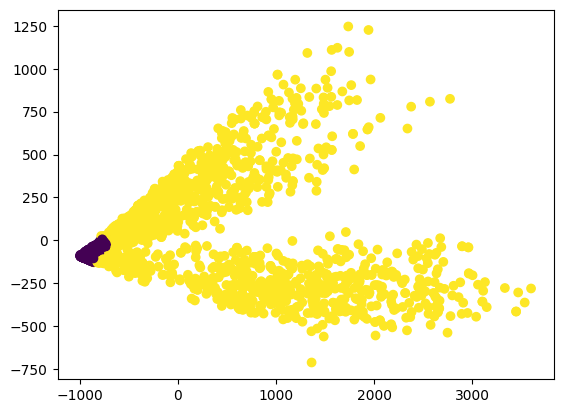

In [644]:
df_PCA = pd.DataFrame(PCA(n_components = 2, copy = False).fit_transform(df))

d_gm = GaussianMixture(n_components=2, random_state=0).fit(df_PCA)
df_PCA['Cluster'] = d_gm.predict(df_PCA)

plt.scatter(df_PCA[0],  df_PCA[1], c = df_PCA['Cluster'])

In [645]:
df

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Level_Basic,Education_Level_High,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Living_Status_Unknown
0,1957,0.315343,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,...,1,0,0,0,0,1,0,1,0,0
1,1954,-0.254598,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,...,1,0,0,0,0,1,0,1,0,0
2,1965,0.966517,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,...,0,1,0,0,0,1,0,0,1,0
3,1984,-1.206496,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,...,0,1,0,0,0,1,0,0,1,0
4,1981,0.322833,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,0.464424,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,...,0,0,0,0,0,1,0,0,1,0
2236,1946,0.599298,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,...,0,1,0,0,0,1,0,0,1,0
2237,1981,0.259431,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,...,0,0,0,0,0,1,0,1,0,0
2238,1956,0.852084,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,...,0,1,0,0,0,1,0,0,1,0


In [646]:
df.iloc[125:126]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Education_Level_Basic,Education_Level_High,Education_Level_Middle,Living_Status_Living Alone,Living_Status_Living with Others,Living_Status_Unknown
136,1976,-2.03275,1.039938,-0.928972,-0.622374,-0.90464,-0.637328,-0.731365,-0.504892,-0.512115,...,0,0,0,0,1,0,0,1,0,0


In [647]:
d1_kmeans.labels_[125]

1

In [648]:
df_PCA = pd.DataFrame(PCA(n_components = 4, copy = False).fit_transform(df))
df_PCA

,0,1,2,3
0,1212.928802,579.984655,6.376357,-0.859052
1,-963.876494,-82.889356,16.753898,-0.367842
2,425.797533,-154.285780,4.418173,-0.427558
3,-934.908324,-81.205392,-13.444238,-0.353044
4,-447.188719,136.649410,-12.530375,2.034034
...,...,...,...,...
2211,1104.814066,364.500630,-1.975763,-0.979670
2212,-237.535435,283.623659,21.297514,4.136658
2213,1478.028310,-78.274322,-13.540165,-1.568145
2214,306.587105,186.678480,11.338295,-1.229006


In [649]:
pc_val = pd.DataFrame({'pcX': pca.explained_variance_ratio_})
pc_val.sort_values('pcX', ascending=False)

,pcX
0,9.391752e-01
1,6.069297e-02
2,1.138339e-04
3,2.582584e-06
4,2.257208e-06
5,1.460405e-06
6,1.210549e-06
7,1.006116e-06
8,8.936386e-07
9,8.476375e-07


# extras

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


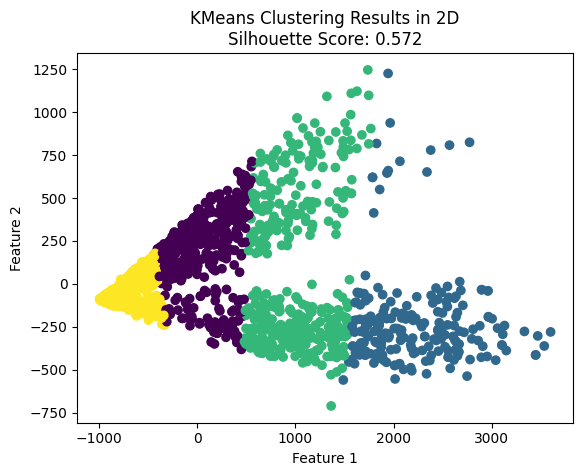

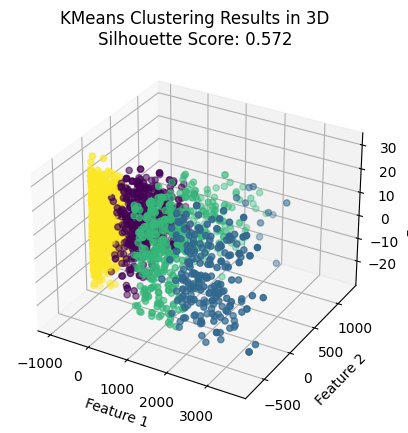

In [650]:
# Fit the KMeans model with the number of clusters set to 3
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

# Get the predictions
predictions = kmeans.predict(df_pca)

# Calculate the silhouette score
silhouette_score_value = silhouette_score(df_pca, predictions)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(df_pca, predictions)

# Calculate the Davies-Bouldin Index
davies_bouldin_score_value = davies_bouldin_score(df_pca, predictions)

# Visualize the results in 2D
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Results in 2D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

# Visualize the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2], c=predictions, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('KMeans Clustering Results in 3D\nSilhouette Score: {0:.3f}'.format(silhouette_score_value))
plt.show()

### Agglomerative Clustering

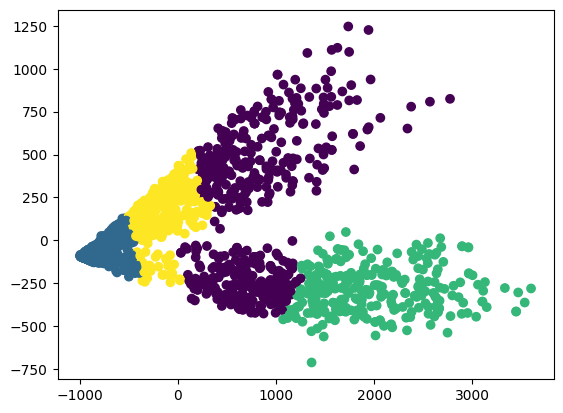

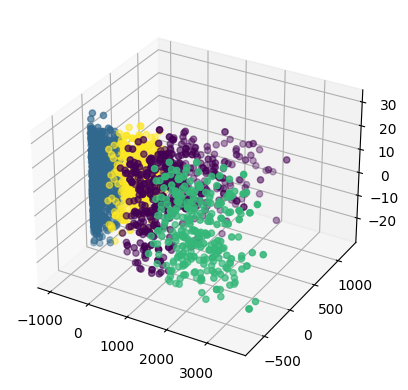

Davies-Bouldin Index: 0.7201564433167333
Silhouette Score: 0.5505668730865872
Calinski-Harabasz Index: 5330.405084446627


In [651]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import davies_bouldin_score

# Generate sample data
X = df_pca

# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_cluster.fit(X)

# Plot the data points colored by their cluster labels in 2D
plt.scatter(X[:, 0], X[:, 1], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Plot the data points colored by their cluster labels in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=agg_cluster.labels_, cmap='viridis')
plt.show()

# Calculate the Davies-Bouldin Index
davies_bouldin_index = davies_bouldin_score(X, agg_cluster.labels_)
print("Davies-Bouldin Index:", davies_bouldin_index)
# Calculate the silhouette score
silhouette_score_value = silhouette_score(X, agg_cluster.labels_)

# Calculate the Calinski-Harabasz Index
calinski_harabasz_score_value = calinski_harabasz_score(X, agg_cluster.labels_)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Index:", calinski_harabasz_score_value)